In [1]:
from spacepy import pycdf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
import matplotlib
import matplotlib.colors as colors
from collections import Counter
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import math
from lmfit.models import GaussianModel
from sklearn import mixture
from sklearn import cluster
from sklearn.decomposition import PCA
from matplotlib.colors import LogNorm
import cdflib
from matplotlib import ticker, cm
import pandas as pd
from minisom import MiniSom
from datetime import datetime
from pathlib import Path
import os.path
import matplotlib.patches as mpatches
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from PIL import Image

In [2]:
cdf = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/ECLAT/C4_CP_AUX_ECLAT_REGION__20020701_000000_20021101_000000_V131120')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf, start=0):
    print(i, item, cdf[i])

0 region_interval__C4_CP_AUX_ECLAT_REGION CDF_EPOCH [17858, 2]
1 region_name__C4_CP_AUX_ECLAT_REGION CDF_CHAR*7 [17858]
2 mean_bxy_gsm__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [17858]
3 sd_bxy_gsm__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [17858]
4 mean_Bz_gsm__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [17858]
5 min_Bz_gsm__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [17858]
6 max_Bz_gsm__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [17858]
7 mean_density__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [17858]
8 mean_total_pressure__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [17858]
9 median_plasma_beta__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [17858]
10 percent_high_Vpar__C4_CP_AUX_ECLAT_REGION CDF_INT4 [17858]
11 percent_high_Vperp__C4_CP_AUX_ECLAT_REGION CDF_INT4 [17858]
12 Vx_min__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [17858]
13 Vx_max__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [17858]
14 sc_pos_gsm__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [17858, 3]
15 n_NS_crossings__C4_CP_AUX_ECLAT_REGION CDF_INT4 [17858]
16 n__C4_CP_AUX_ECLAT_REGION CDF_INT4 [17858]
17 min_data_res__C4_CP_AU

In [3]:
interval = cdf[0][...]
region = cdf[1][...]

UR: Undefined Region

NN_LOBE: Northern hemisphere tail lobe region

NN_BR: Northern hemisphere boundary region

NN_OPS: Northern hemisphere outer plasma sheet

NN_IPS: Northern hemisphere inner plasma sheet

NS_NSR: North-South crossing of the neutral sheet

00_NSR: Neutral sheet data point, Bx=0

SN_NSR: South-North crossing of the neutral sheet

SS_IPS: Southern hemisphere inner plasma sheet

SS_OPS: Southern hemisphere outer plasma sheet

SS_BR: Southern hemisphere boundary region

SS_LOBE: Southern hemisphere tail lobe region

In [4]:
#create an array of indices when Cluster is in PS 
N = [] 
region_list = list(region)

for i in range(len(region_list)):
    if region_list[i] == 'SS_BR  ':
        N.append(i)

In [5]:
#print interval durations (in seconds) when Cluster is in PS 
for j in range(len(N)):
    if (interval[N[j],1]-interval[N[j],0]).seconds > 3600:    #only look at intervals with duration > 1hr (3600)
        print(N[j],(interval[N[j],1]-interval[N[j],0]).seconds)

5134 3882
17407 4781


In [6]:
period = interval[446]

In [7]:
time_array_start = (period[0].year,period[0].month,period[0].day,period[0].hour,period[0].minute,period[0].second)
time_array_end = (period[1].year,period[1].month,period[1].day,period[1].hour,period[1].minute,period[1].second)

strs = ["" for x in range(6)]
strs1 = ["" for x in range(6)]

for i in range(len(time_array_start)):
    if time_array_start[i]<10:
        strs[i]='0'+str(time_array_start[i])
    else:
        strs[i]=str(time_array_start[i])
    if time_array_end[i]<10:
        strs1[i]='0'+str(time_array_end[i])
    else:
        strs1[i]=str(time_array_end[i])

In [8]:
strs,strs1

(['2002', '07', '05', '04', '45', '53'],
 ['2002', '07', '05', '04', '45', '53'])

In [9]:
#NN_OPS
cdf1 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20020920_174003_20020920_191546_V170620.cdf')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf1, start=0):
    print(i, item, cdf1[i])

0 time_tags__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_EPOCH [1428]
1 time_tags_DeltaLower__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1428]
2 time_tags_DeltaUpper__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1428]
3 Angle_SR2phi__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1428]
4 Mode_SunpulseRephaseOffset__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428]
5 Mode_Sensor__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428]
6 Mode_SweepMode_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428]
7 Mode_Preset_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428]
8 Mode_EnergyLevelRange_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428, 2]
9 Mode_EnergyMaxMin_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1428, 2]
10 Mode_MCPlevel_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428]
11 Mode_DataOrigin_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428]
12 Mode_SweepMode_LEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428]
13 Mode_Preset_LEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428]
14 Mode_EnergyLevelRange_LEEA__C4_CP_PEA_PITCH_SPIN_DEFlux 

In [10]:
epoch1 = cdf1[0][...]
data1 = cdf1[26][...]
energy1 = cdf1[20][...]
pa1 = cdf1[23][...]
for i in range(0,len(energy1[0])):
    print(i,energy1[0,i])

0 24023.0
1 19019.7
2 15231.0
3 12210.3
4 9777.4
5 7836.8
6 6294.6
7 5031.4
8 4042.1
9 3231.8
10 2593.6
11 2073.6
12 1662.0
13 1328.8
14 1066.3
15 852.78
16 686.63
17 549.54
18 441.09
19 353.69
20 283.62
21 226.03
22 180.69
23 145.09
24 116.42
25 93.56
26 74.645
27 60.124
28 48.038
29 38.938
30 31.075
31 25.432
32 20.564
33 16.49
34 13.186
35 10.572
36 9.209
37 8.154
38 7.116
39 5.913
40 -1.0
41 -1.0
42 -1.0
43 -1.0


In [11]:
#NN_OPS
cdf2 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20020913_131122_20020913_142253_V170620.cdf')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf2, start=0):
#     print(i, item, cdf2[i])
epoch2 = cdf2[0][...]
data2 = cdf2[26][...]
energy2 = cdf2[20][...]
pa2 = cdf2[23][...]
print(energy2[0,0:30])

[24023.    19019.7   15231.    12210.3    9777.4    7836.8    6294.6
  5031.4    4042.1    3231.8    2593.6    2073.6    1662.     1328.8
  1066.3     852.78    686.63    549.54    441.09    353.69    283.62
   226.03    180.69    145.09    116.42     93.56     74.645    60.124
    48.038    38.938]


In [12]:
#NN_OPS
cdf3 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20050807_104833_20050807_123236_V170628.cdf')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf3, start=0):
#     print(i, item, cdf3[i])
epoch3 = cdf3[0][...]
data3 = cdf3[26][...]
energy3 = cdf3[20][...]
pa3 = cdf3[23][...]
print(energy3[0,0:30])

[23896.    18968.5   15219.6   12188.9    9780.     7835.3    6283.9
  5028.2    4032.     3226.9    2588.8    2071.7    1661.7    1329.4
  1063.3     850.3     681.85    545.54    439.5     352.1     282.98
   226.28    181.54    145.8     117.35     94.251    75.614    60.893
    48.038    38.109]


In [13]:
#NN_OPS
cdf4 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20050828_161837_20050828_180027_V170628.cdf')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf4, start=0):
#     print(i, item, cdf4[i])
epoch4 = cdf4[0][...]
data4 = cdf4[26][...]
energy4 = cdf4[20][...]
pa4 = cdf4[23][...]
print(energy4[0,0:30])

[23896.    18968.5   15219.6   12188.9    9780.     7835.3    6283.9
  5028.2    4032.     3226.9    2588.8    2071.7    1661.7    1329.4
  1063.3     850.3     681.85    545.54    439.5     352.1     282.98
   226.28    181.54    145.8     117.35     94.251    75.614    60.893
    48.038    38.109]


In [14]:
#NN_OPS
cdf5= pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20031013_075830_20031013_113207_V170630')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf5, start=0):
#     print(i, item, cdf5[i])
epoch5 = cdf5[0][...]
data5 = cdf5[26][...]
energy5 = cdf5[20][...]
pa5 = cdf5[23][...]
print(energy5[0,0:30])

[23896.    18968.5   15219.6   12188.9    9780.     7835.3    6283.9
  5028.2    4032.     3226.9    2588.8    2071.7    1661.7    1329.4
  1063.3     850.3     681.85    545.54    439.5     352.1     282.98
   226.28    181.54    145.8     117.35     94.251    75.614    60.893
    48.038    38.109]


In [15]:
#NN_OPS
cdf6= pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20031018_045433_20031018_075402_V170630')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf6, start=0):
#     print(i, item, cdf6[i])
epoch6 = cdf6[0][...]
data6 = cdf6[26][...]
energy6 = cdf6[20][...]
pa6 = cdf6[23][...]
print(energy6[0,0:30])

[23896.    18968.5   15219.6   12188.9    9780.     7835.3    6283.9
  5028.2    4032.     3226.9    2588.8    2071.7    1661.7    1329.4
  1063.3     850.3     681.85    545.54    439.5     352.1     282.98
   226.28    181.54    145.8     117.35     94.251    75.614    60.893
    48.038    38.109]


In [16]:
#NN_IPS
cdf7= pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20031011_050417_20031011_061328_V170630')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf7, start=0):
#     print(i, item, cdf7[i])
epoch7 = cdf7[0][...]
data7 = cdf7[26][...]
energy7 = cdf7[20][...]
pa7 = cdf7[23][...]
print(energy7[0,0:30])

[23896.    18968.5   15219.6   12188.9    9780.     7835.3    6283.9
  5028.2    4032.     3226.9    2588.8    2071.7    1661.7    1329.4
  1063.3     850.3     681.85    545.54    439.5     352.1     282.98
   226.28    181.54    145.8     117.35     94.251    75.614    60.893
    48.038    38.109]


In [17]:
#NN_IPS
cdf8 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20070717_103913_20070717_122636_V170629')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf8, start=0):
#     print(i, item, cdf8[i])
epoch8 = cdf8[0][...]
data8 = cdf8[26][...]
energy8 = cdf8[20][...]
pa8 = cdf8[23][...]
print(energy8[0,0:30])

[23896.    18968.5   15219.6   12188.9    9780.     7835.3    6283.9
  5028.2    4032.     3226.9    2588.8    2071.7    1661.7    1329.4
  1063.3     850.3     681.85    545.54    439.5     352.1     282.98
   226.28    181.54    145.8     117.35     94.251    75.614    60.893
    48.038    38.109]


In [18]:
#NN_IPS
cdf9 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20070717_070632_20070717_083245_V170629')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf9, start=0):
#     print(i, item, cdf9[i])
epoch9 = cdf9[0][...]
data9 = cdf9[26][...]
energy9 = cdf9[20][...]
pa9 = cdf9[23][...]
print(energy9[0,0:30])

[23896.    18968.5   15219.6   12188.9    9780.     7835.3    6283.9
  5028.2    4032.     3226.9    2588.8    2071.7    1661.7    1329.4
  1063.3     850.3     681.85    545.54    439.5     352.1     282.98
   226.28    181.54    145.8     117.35     94.251    75.614    60.893
    48.038    38.109]


In [19]:
#SS_OPS
cdf10 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20031023_081241_20031023_135211_V170630')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf10, start=0):
#     print(i, item, cdf10[i])
epoch10 = cdf10[0][...]
data10 = cdf10[26][...]
energy10 = cdf10[20][...]
pa10 = cdf10[23][...]
print(energy10[0,0:30])

[23896.    18968.5   15219.6   12188.9    9780.     7835.3    6283.9
  5028.2    4032.     3226.9    2588.8    2071.7    1661.7    1329.4
  1063.3     850.3     681.85    545.54    439.5     352.1     282.98
   226.28    181.54    145.8     117.35     94.251    75.614    60.893
    48.038    38.109]


In [20]:
#SS_IPS
cdf11 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20050810_021518_20050810_032129_V170628')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf11, start=0):
#     print(i, item, cdf11[i])
epoch11 = cdf11[0][...]
data11 = cdf11[26][...]
energy11 = cdf11[20][...]
pa11 = cdf11[23][...]
print(energy11[0,0:30])

[23896.    18968.5   15219.6   12188.9    9780.     7835.3    6283.9
  5028.2    4032.     3226.9    2588.8    2071.7    1661.7    1329.4
  1063.3     850.3     681.85    545.54    439.5     352.1     282.98
   226.28    181.54    145.8     117.35     94.251    75.614    60.893
    48.038    38.109]


In [21]:
#SS_OPS
cdf12 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20081016_003641_20081016_014428_V170630')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf12, start=0):
#     print(i, item, cdf12[i])
epoch12 = cdf12[0][...]
data12 = cdf12[26][...]
energy12 = cdf12[20][...]
pa12 = cdf12[23][...]
print(energy12[0,0:30])

[24023.    19019.7   15231.    12210.3    9777.4    7836.8    6294.6
  5031.4    4042.1    3231.8    2593.6    2073.6    1662.     1328.8
  1066.3     852.78    686.63    549.54    441.09    353.69    283.62
   226.03    180.69    145.09    116.42     93.56     74.645    60.124
    48.038    38.938]


In [22]:
#SS_IPS
cdf13 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20040912_152547_20040912_162714_V170628')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf13, start=0):
#     print(i, item, cdf13[i])
epoch13 = cdf13[0][...]
data13 = cdf13[26][...]
energy13 = cdf13[20][...]
pa13 = cdf13[23][...]
print(energy13[0,0:30])

[23896.    18968.5   15219.6   12188.9    9780.     7835.3    6283.9
  5028.2    4032.     3226.9    2588.8    2071.7    1661.7    1329.4
  1063.3     850.3     681.85    545.54    439.5     352.1     282.98
   226.28    181.54    145.8     117.35     94.251    75.614    60.893
    48.038    38.109]


In [23]:
#SS_IPS
cdf14 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20060804_052038_20060804_082059_V170629')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf14, start=0):
#     print(i, item, cdf14[i])
epoch14 = cdf14[0][...]
data14 = cdf14[26][...]
energy14 = cdf14[20][...]
pa14 = cdf14[23][...]
print(energy14[0,0:30])

[23896.    18968.5   15219.6   12188.9    9780.     7835.3    6283.9
  5028.2    4032.     3226.9    2588.8    2071.7    1661.7    1329.4
  1063.3     850.3     681.85    545.54    439.5     352.1     282.98
   226.28    181.54    145.8     117.35     94.251    75.614    60.893
    48.038    38.109]


In [24]:
#SS_OPS
cdf15 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20090729_000007_20090729_010352_V160617')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf15, start=0):
#     print(i, item, cdf15[i])
epoch15 = cdf15[0][...]
data15 = cdf15[26][...]
energy15 = cdf15[20][...]
pa15 = cdf15[23][...]
print(energy15[0,0:30])

[24023.    19019.7   15231.    12210.3    9777.4    7836.8    6294.6
  5031.4    4042.1    3231.8    2593.6    2073.6    1662.     1328.8
  1066.3     852.78    686.63    549.54    441.09    353.69    283.62
   226.03    180.69    145.09    116.42     93.56     74.645    60.124
    48.038    38.938]


In [25]:
#import cdf files from BRs and LOBEs
times = (('2002', '09', '01', '08', '49', '32','2002', '09', '01', '12', '10', '44'), # NN_LOBE
        ('2002', '09', '08', '14', '17', '19','2002', '09', '08', '17', '15', '48'), # NN_BR
        ('2002', '10', '29', '05', '31', '24','2002', '10', '29', '06', '51', '05'), # SS_BR
        ('2003', '09', '29', '02', '38', '25','2003', '09', '29', '05', '07', '01'), # NN_LOBE
        ('2004', '10', '22', '11', '54', '08','2004', '10', '22', '13', '12', '09'), # NN_BR
        ('2004', '10', '25', '15', '55', '02','2004', '10', '25', '17', '29', '19'), # SS_BR
        ('2005', '10', '12', '21', '03', '33','2005', '10', '12', '21', '04', '31'), # SS_BR
        ('2005', '08', '17', '13', '31', '44','2005', '08', '17', '14', '48', '09'), # NN_BR
        ('2006', '10', '07', '00', '00', '05','2006', '10', '07', '02', '48', '35'), # NN_LOBE
        ('2007', '08', '06', '17', '07', '06','2007', '08', '06', '19', '58', '28'), # SS_LOBE
        ('2008', '07', '26', '02', '27', '41','2008', '07', '26', '05', '53', '30'), # SS_LOBE
        ('2009', '09', '15', '12', '59', '53','2009', '09', '15', '15', '48', '48')) # SS_LOBE

In [26]:
#import cdf files from BRs and LOBEs

epoch_deflux = np.empty((0), int)
data_deflux = np.empty((0,12,44), int)

for i in range(len(times)):
    
    stamp = times[i][0]+times[i][1]+times[i][2]+'_'+times[i][3]+times[i][4]+times[i][5]+'_'+times[i][6]+times[i][7]+times[i][8]+'_'+times[i][9]+times[i][10]+times[i][11]
    
    #remember .cdf 
    file = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__'+stamp+'_V160617.cdf'
    file1 = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__'+stamp+'_V170620.cdf'
    file2 = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__'+stamp+'_V170628.cdf'
    file3 = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__'+stamp+'_V170629.cdf'
    file4 = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__'+stamp+'_V170630.cdf'

    if os.path.exists(file):
        cdf_deflux = pycdf.CDF(file)
    elif os.path.exists(file1):
        cdf_deflux = pycdf.CDF(file1)
    elif os.path.exists(file2):
        cdf_deflux = pycdf.CDF(file2)
    elif os.path.exists(file3):
        cdf_deflux = pycdf.CDF(file3)
    elif os.path.exists(file4):
        cdf_deflux = pycdf.CDF(file4)
    
    epoch_deflux = np.append(epoch_deflux,cdf_deflux[0][...],axis=0)
    data_deflux = np.append(data_deflux,cdf_deflux[26][...],axis=0)
    
print(np.shape(epoch_deflux))
print(np.shape(data_deflux))

(23114,)
(23114, 12, 44)


In [27]:
#combine all data and epochs and flatten

data_all = np.concatenate((data1[:,:,0:26],data2[:,:,0:26],data3[:,:,0:26],data4[:,:,0:26],data5[:,:,0:26],data6[:,:,0:26]),axis=0)
epoch_all = np.concatenate((epoch1[:],epoch2[:],epoch3[:],epoch4[:],epoch5[:],epoch6[:]),axis=0)
############### try removing data5 to look at big cluster

#combine NN_OPS with NN_IPS:
data_all = np.concatenate((data_all[:,:,:],data7[:,:,0:26],data8[:,:,0:26],data9[:,:,0:26]),axis=0)
epoch_all = np.concatenate((epoch_all[:],epoch7[:],epoch8[:],epoch9[:]),axis=0)

#combine NN_OPS and NN_IPS with SS_OPS and SS_IPS
data_all = np.concatenate((data_all[:,:,:],data10[:,:,0:26],data11[:,:,0:26],data12[:,:,0:26],data13[:,:,0:26],data14[:,:,0:26],data15[:,:,0:26]),axis=0)
epoch_all = np.concatenate((epoch_all[:],epoch10[:],epoch11[:],epoch12[:],epoch13[:],epoch14[:],epoch15[:]),axis=0)

#combine plasma sheet periods with BR and Lobes
data_all = np.concatenate((data_all[:,:,:],data_deflux[:,:,0:26]),axis=0)
epoch_all = np.concatenate((epoch_all[:],epoch_deflux[:]),axis=0)

##normalise each data period separately:
#data_all = np.concatenate((data1[:,:,0:26]/np.max(data1[:,:,0:26]),data2[:,:,0:26]/np.max(data2[:,:,0:26]),data3[:,:,0:26]/np.max(data3[:,:,0:26]),data4[:,:,0:26]/np.max(data4[:,:,0:26]),data5[:,:,0:26]/np.max(data5[:,:,0:26]),data6[:,:,0:26]/np.max(data6[:,:,0:26])),axis=0)

print(data_all.shape)
print(epoch_all.shape)
new_data_all = data_all.reshape(len(data_all),-1)
print(new_data_all.shape)

(49721, 12, 26)
(49721,)
(49721, 312)


(1428, 2)


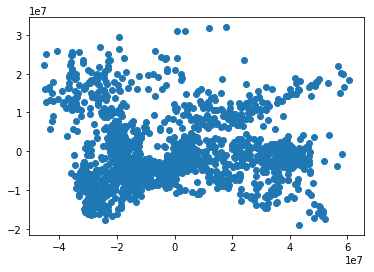

In [28]:
new_data1 = data1[:,:,0:26].reshape(len(epoch1),-1)
model1 = PCA(n_components=2)
model1.fit(new_data1)
new_data1_2d = model1.transform(new_data1)
print(new_data1_2d.shape)
plt.scatter(new_data1_2d[:,0],new_data1_2d[:,1])

(3184, 2)


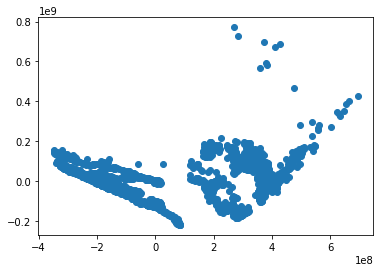

In [29]:
new_data5 = data5[:,:,0:26].reshape(len(epoch5),-1)
model5 = PCA(n_components=2)
model5.fit(new_data5)
new_data5_2d = model5.transform(new_data5)
print(new_data5_2d.shape)
plt.scatter(new_data5_2d[:,0],new_data5_2d[:,1])

(1245, 2)


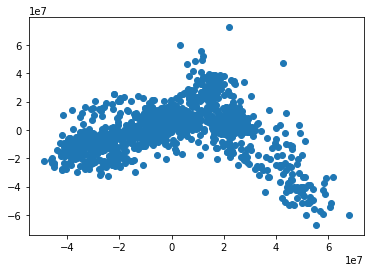

In [30]:
new_data9 = data9[:,:,0:26].reshape(len(epoch9),-1)
model9 = PCA(n_components=2)
model9.fit(new_data9)
new_data9_2d = model9.transform(new_data9)
print(new_data9_2d.shape)
plt.scatter(new_data9_2d[:,0],new_data9_2d[:,1])

(49721, 2)


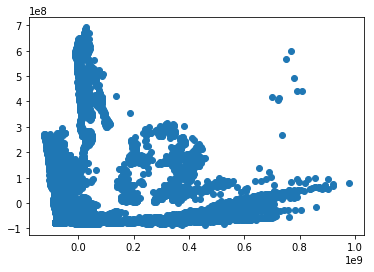

In [31]:
# fit pca 2-components to all flattened data, pre-autoencoder

model_all = PCA(n_components=2)
model_all.fit(new_data_all)
new_data_all_2d = model_all.transform(new_data_all)
print(new_data_all_2d.shape)
plt.scatter(new_data_all_2d[:,0],new_data_all_2d[:,1])

In [32]:
#look at outliers from above
df = pd.DataFrame({'PCA1': new_data_all_2d[:,0], 'PCA2': new_data_all_2d[:,1]})
new_df = df.sort_values(by='PCA1')
new_df.tail(5)

PCA1          PCA2
15491  9.015758e+08  5.737142e+07
8640   9.024977e+08  9.450347e+07
15494  9.209891e+08  6.909542e+07
15495  9.212148e+08  7.331319e+07
15493  9.770639e+08  7.775846e+07

2003-10-13 09:51:22.909000


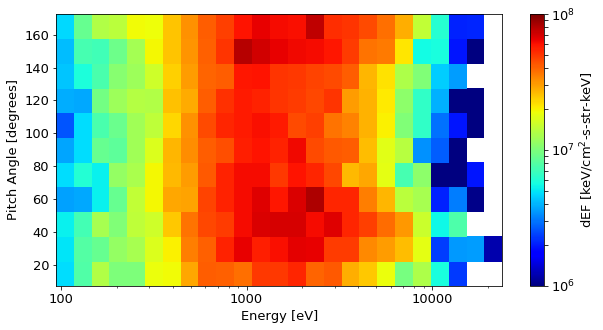

In [33]:
#example of distribution
time = 7164
print(epoch_all[time])
#PITCH_SPIN 2D plotting:
X, Y = np.meshgrid(energy4[0,0:26],pa4)
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
D = (data_all[time,0:len(pa4),0:26])
#surf = ax.pcolormesh((X), Y, D, cmap=cm.jet)
vmin, vmax = np.min(1000000), np.max(1e8)
levels = np.linspace(vmin,vmax,10)
surf = ax.pcolormesh((X), Y, D, cmap=cm.jet,norm=LogNorm(vmin,vmax))
#surf = ax.contourf((X), Y, D, 100, cmap=cm.jet)
cbar = fig.colorbar(surf)
cbar.ax.tick_params(labelsize=13)
cbar.set_label('dEF [keV/cm$^{2}$-s-str-keV]',fontsize=13) ####Particle or Energy Flux
ax.set_ylabel('Pitch Angle [degrees]',fontsize=13)
ax.set_xlabel('Energy [eV]',fontsize=13)
ax.tick_params(labelsize=13)
ax.set_xscale('log')
#ax.set_xticks([50, 100, 200, 300, 400, 500])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax.set_xlim(0,5)
plt.show()

# Autoencoders

In [34]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 9.75, assuming the input is 312 floats

# this is our input placeholder
input_img = Input(shape=(312,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(312, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [35]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [36]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [37]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [38]:
# make sure to use flattened data
x = new_data_all
x_train, x_test = train_test_split(x, test_size=0.5, random_state=4)
print(x_train.shape)
print(x_test.shape)

(24860, 312)
(24861, 312)


In [39]:
x_all = x.astype('float32') / np.max(x)
x_train = x_train.astype('float32') / np.max(x)
x_test = x_test.astype('float32') / np.max(x)

In [40]:
history = autoencoder.fit(x_all, x_all, ## x_all,x_all or x_train,x_train
                epochs=500,
                batch_size=256,
                shuffle=True,
                validation_split=1/12.) # validation_split=1/12. or validation_test = x_test,x_test
                #last line helps model calculate val_loss

Train on 45577 samples, validate on 4144 samples
Epoch 1/500
45577/45577 [==============================] - 1s 16us/step - loss: 0.5621 - val_loss: 0.2789
Epoch 2/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.1494 - val_loss: 0.0591
Epoch 3/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.1072 - val_loss: 0.0403
Epoch 4/500
45577/45577 [==============================] - 1s 12us/step - loss: 0.1006 - val_loss: 0.0339
Epoch 5/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.0962 - val_loss: 0.0301
Epoch 6/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.0929 - val_loss: 0.0274
Epoch 7/500
45577/45577 [==============================] - 1s 12us/step - loss: 0.0904 - val_loss: 0.0251
Epoch 8/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.0887 - val_loss: 0.0235
Epoch 9/500
45577/45577 [==============================] - 1s 12us/step - loss: 0.0875 - val_loss: 0.02

45577/45577 [==============================] - 1s 12us/step - loss: 0.0765 - val_loss: 0.0161
Epoch 78/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.0765 - val_loss: 0.0161
Epoch 79/500
45577/45577 [==============================] - 1s 17us/step - loss: 0.0765 - val_loss: 0.0161
Epoch 80/500
45577/45577 [==============================] - 1s 17us/step - loss: 0.0764 - val_loss: 0.0160
Epoch 81/500
45577/45577 [==============================] - 1s 18us/step - loss: 0.0764 - val_loss: 0.0160
Epoch 82/500
45577/45577 [==============================] - 0s 10us/step - loss: 0.0764 - val_loss: 0.0160
Epoch 83/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.0763 - val_loss: 0.0160
Epoch 84/500
45577/45577 [==============================] - 1s 12us/step - loss: 0.0763 - val_loss: 0.0159
Epoch 85/500
45577/45577 [==============================] - 1s 12us/step - loss: 0.0763 - val_loss: 0.0159
Epoch 86/500
45577/45577 [========================

45577/45577 [==============================] - 1s 21us/step - loss: 0.0752 - val_loss: 0.0151
Epoch 154/500
45577/45577 [==============================] - 1s 21us/step - loss: 0.0752 - val_loss: 0.0151
Epoch 155/500
45577/45577 [==============================] - 1s 22us/step - loss: 0.0752 - val_loss: 0.0151
Epoch 156/500
45577/45577 [==============================] - 1s 21us/step - loss: 0.0752 - val_loss: 0.0151
Epoch 157/500
45577/45577 [==============================] - 1s 19us/step - loss: 0.0752 - val_loss: 0.0151
Epoch 158/500
45577/45577 [==============================] - 1s 13us/step - loss: 0.0752 - val_loss: 0.0151
Epoch 159/500
45577/45577 [==============================] - 1s 21us/step - loss: 0.0752 - val_loss: 0.0151
Epoch 160/500
45577/45577 [==============================] - 1s 24us/step - loss: 0.0752 - val_loss: 0.0151
Epoch 161/500
45577/45577 [==============================] - 1s 16us/step - loss: 0.0752 - val_loss: 0.0151
Epoch 162/500
45577/45577 [===============

Epoch 229/500
45577/45577 [==============================] - 1s 17us/step - loss: 0.0748 - val_loss: 0.0147
Epoch 230/500
45577/45577 [==============================] - 1s 13us/step - loss: 0.0748 - val_loss: 0.0147
Epoch 231/500
45577/45577 [==============================] - 1s 14us/step - loss: 0.0748 - val_loss: 0.0147
Epoch 232/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.0748 - val_loss: 0.0147
Epoch 233/500
45577/45577 [==============================] - 1s 16us/step - loss: 0.0748 - val_loss: 0.0147
Epoch 234/500
45577/45577 [==============================] - 1s 14us/step - loss: 0.0748 - val_loss: 0.0147
Epoch 235/500
45577/45577 [==============================] - 1s 16us/step - loss: 0.0748 - val_loss: 0.0147
Epoch 236/500
45577/45577 [==============================] - 1s 15us/step - loss: 0.0748 - val_loss: 0.0147
Epoch 237/500
45577/45577 [==============================] - 1s 14us/step - loss: 0.0748 - val_loss: 0.0147
Epoch 238/500
45577/45577 [=

Epoch 305/500
45577/45577 [==============================] - 1s 18us/step - loss: 0.0746 - val_loss: 0.0144
Epoch 306/500
45577/45577 [==============================] - 1s 23us/step - loss: 0.0746 - val_loss: 0.0144
Epoch 307/500
45577/45577 [==============================] - 1s 13us/step - loss: 0.0746 - val_loss: 0.0144
Epoch 308/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.0746 - val_loss: 0.0144
Epoch 309/500
45577/45577 [==============================] - 1s 14us/step - loss: 0.0746 - val_loss: 0.0144
Epoch 310/500
45577/45577 [==============================] - 1s 12us/step - loss: 0.0746 - val_loss: 0.0144
Epoch 311/500
45577/45577 [==============================] - 1s 13us/step - loss: 0.0746 - val_loss: 0.0144
Epoch 312/500
45577/45577 [==============================] - 1s 13us/step - loss: 0.0746 - val_loss: 0.0144
Epoch 313/500
45577/45577 [==============================] - 1s 13us/step - loss: 0.0746 - val_loss: 0.0144
Epoch 314/500
45577/45577 [=

Epoch 381/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0744 - val_loss: 0.0142
Epoch 382/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.0744 - val_loss: 0.0142
Epoch 383/500
45577/45577 [==============================] - 0s 10us/step - loss: 0.0744 - val_loss: 0.0142
Epoch 384/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0744 - val_loss: 0.0142
Epoch 385/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0744 - val_loss: 0.0142
Epoch 386/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0744 - val_loss: 0.0142
Epoch 387/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0744 - val_loss: 0.0142
Epoch 388/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0744 - val_loss: 0.0142
Epoch 389/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0744 - val_loss: 0.0142
Epoch 390/500
45577/45577 [=

Epoch 457/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0743 - val_loss: 0.0140
Epoch 458/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0743 - val_loss: 0.0140
Epoch 459/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0743 - val_loss: 0.0140
Epoch 460/500
45577/45577 [==============================] - 0s 10us/step - loss: 0.0743 - val_loss: 0.0140
Epoch 461/500
45577/45577 [==============================] - 0s 10us/step - loss: 0.0743 - val_loss: 0.0140
Epoch 462/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0743 - val_loss: 0.0140
Epoch 463/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0743 - val_loss: 0.0140
Epoch 464/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0743 - val_loss: 0.0140
Epoch 465/500
45577/45577 [==============================] - 0s 10us/step - loss: 0.0743 - val_loss: 0.0140
Epoch 466/500
45577/45577 [=

In [41]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_all) ## x_all or (x_test)
decoded_imgs = decoder.predict(encoded_imgs) ## same as autoencoder.predict(x_all)
print(encoded_imgs.shape)
print(decoded_imgs.shape)

(49721, 32)
(49721, 312)


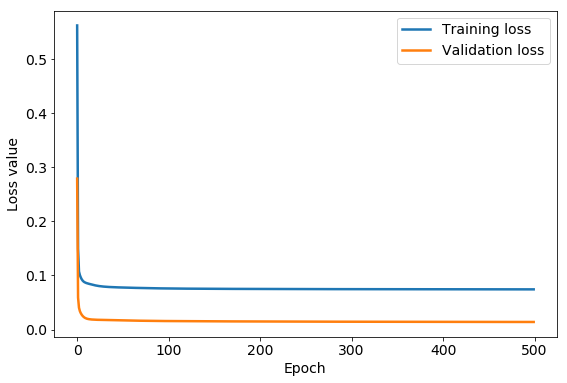

In [42]:
plt.figure(figsize=(9,6))
plt.plot(history.history['loss'],linewidth=2.5)
plt.plot(history.history['val_loss'],linewidth=2.5)
plt.ylabel('Loss value',fontsize=14)
plt.xlabel('Epoch',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Training loss', 'Validation loss'], loc='upper right',fontsize=14)
plt.show()

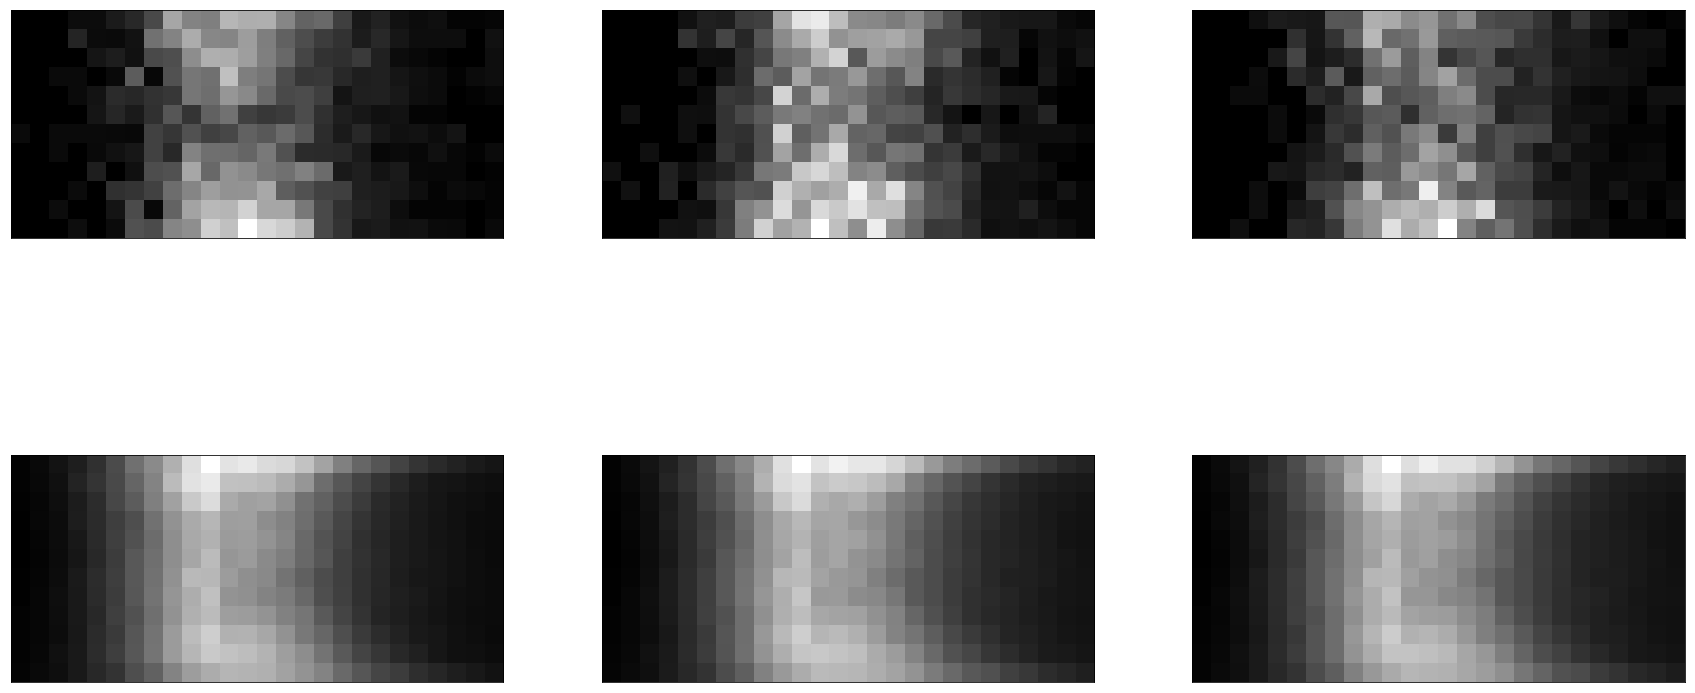

In [43]:
n = 3  # how many digits we will display
plt.figure(figsize=(30,15))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_all[i].reshape(12, 26)) ## x_all or x_test
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(12, 26))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [44]:
##### Outlier detection using Autoencoders
errors = []

for i in range(0,len(x_all)):
    mse = np.mean((x_all[i] - decoded_imgs[i])**2)
    errors.append(mse)

In [45]:
#threshold to determine which data are outliers, based on error

threshold = np.quantile(errors,0.998) 
print('mse 99.8% threshold:',threshold)

mse 99.8% threshold: 0.0015970349730923478


In [46]:
indexes = np.where(np.array(errors) >= threshold)[0]

In [47]:
for i in range(len(indexes)):
    print(indexes[i], epoch_all[indexes[i]])

4356 2005-08-28 16:43:08.209000
4358 2005-08-28 16:43:16.502000
4359 2005-08-28 16:43:20.647000
4361 2005-08-28 16:43:28.939000
4364 2005-08-28 16:43:41.369000
8640 2003-10-13 11:30:51.095000
8653 2003-10-13 11:31:43.203000
8654 2003-10-13 11:31:47.213000
8655 2003-10-13 11:31:51.223000
8657 2003-10-13 11:31:59.231000
8658 2003-10-13 11:32:03.246000
10853 2003-10-18 07:21:34.040000
10858 2003-10-18 07:21:54.078000
10859 2003-10-18 07:21:58.082000
15483 2003-10-23 08:34:59.658000
15489 2003-10-23 08:35:23.708000
15490 2003-10-23 08:35:27.717000
15491 2003-10-23 08:35:31.725000
15492 2003-10-23 08:35:35.732000
15493 2003-10-23 08:35:39.742000
15494 2003-10-23 08:35:43.747000
15495 2003-10-23 08:35:47.751000
15496 2003-10-23 08:35:51.758000
15497 2003-10-23 08:35:55.771000
15498 2003-10-23 08:35:59.784000
15501 2003-10-23 08:36:11.806000
20254 2005-08-10 02:16:57.026000
20257 2005-08-10 02:17:09.457000
20283 2005-08-10 02:18:57.254000
20288 2005-08-10 02:19:17.981000
20291 2005-08-10 02:1

In [48]:
epoch_all[4364]

datetime.datetime(2005, 8, 28, 16, 43, 41, 369000)

(49721, 2)


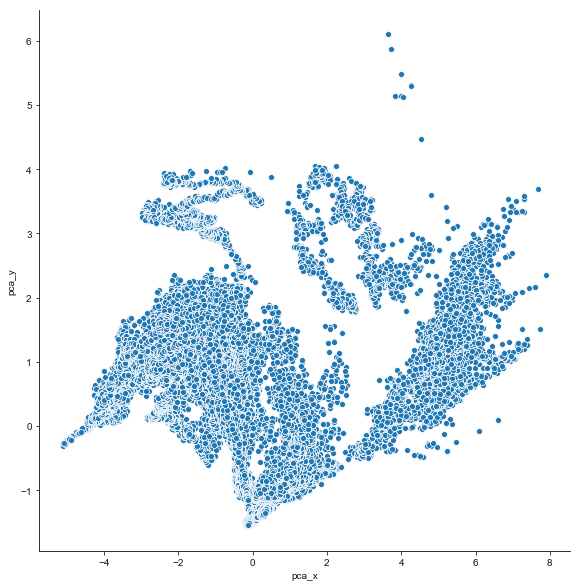

In [49]:
# try pca-2 for encoded 32 dimension testing data, pre decoding (recommended as data is in lower dimension format)

model_encoder = PCA(n_components=2)
encoded_imgs_2d = model_encoder.fit_transform(encoded_imgs)
print(encoded_imgs_2d.shape)
df_pca = pd.DataFrame({'pca_x':encoded_imgs_2d[:,0], 'pca_y':encoded_imgs_2d[:,1]})
sns.pairplot(x_vars=['pca_x'], y_vars=['pca_y'], data=df_pca, height=8)
sns.set(style="whitegrid")

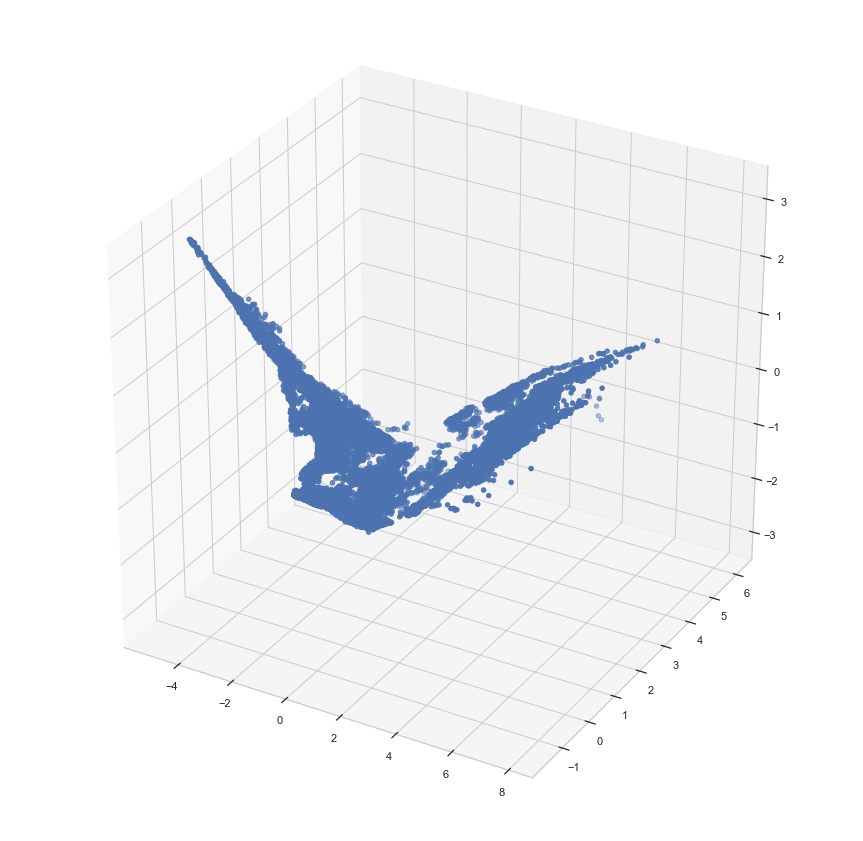

In [50]:
# try pca-3 for encoded 32 dimension testing data, pre decoding (recommended as data is in lower dimension format)

model_encoder = PCA(n_components=3)
encoded_imgs_3d = model_encoder.fit_transform(encoded_imgs)

%matplotlib inline

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_imgs_3d[:,0],encoded_imgs_3d[:,1],encoded_imgs_3d[:,2])

In [51]:
## estimate how many regions exist in the pca_3D data
ms_clustering = MeanShift(bandwidth=1.0,bin_seeding=True).fit(encoded_imgs_3d)

In [52]:
Counter(ms_clustering.labels_)

Counter({1: 9274,
         2: 8544,
         0: 23297,
         4: 2148,
         6: 372,
         7: 593,
         5: 468,
         3: 5016,
         8: 9})

In [53]:
## use to estimate probabilities of assigning a data point to each cluster
gmm = mixture.GaussianMixture(n_components=8, covariance_type='full').fit(encoded_imgs_3d)
gmm_clustering = gmm.predict(encoded_imgs_3d)

In [54]:
# use the max value at each time for the probability of the current allocated cluster
gmm_proba = gmm.predict_proba(encoded_imgs_3d)

label_proba = []
for i in range(len(gmm_proba)):
    label_proba.append(np.max(gmm_proba[i]))
    
len(label_proba)

49721

(array([0.0000e+00, 1.5000e+01, 2.8000e+01, 4.9000e+01, 5.6400e+02,
        5.7600e+02, 5.5300e+02, 5.9100e+02, 6.0200e+02, 6.9700e+02,
        8.2000e+02, 9.5900e+02, 1.6760e+03, 4.2591e+04]),
 array([0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 ,
        0.85, 0.9 , 0.95, 1.  ]),
 <a list of 14 Patch objects>)

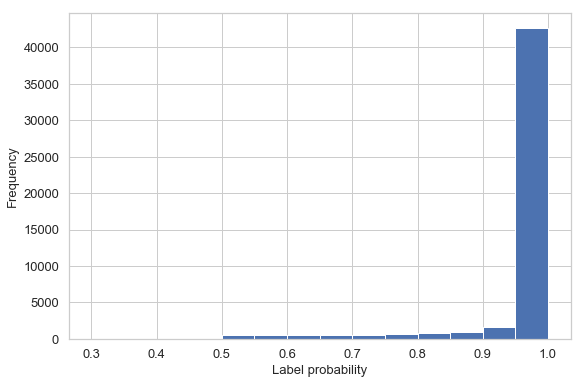

In [55]:
plt.figure(figsize=(9,6))
plt.xlabel('Label probability',fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
(plt.hist(label_proba,14,(0.3,1)))

In [56]:
ac_clustering_3 = np.load('ac_clustering_3.npz')['arr_0']

In [57]:
palette=['steelblue','darkorange','forestgreen','firebrick','purple','sienna','palevioletred','grey']

In [58]:
encoded_imgs_3d_0 = []
encoded_imgs_3d_1 = []
encoded_imgs_3d_2 = []
encoded_imgs_3d_3 = []
encoded_imgs_3d_4 = []
encoded_imgs_3d_5 = []
encoded_imgs_3d_6 = []
encoded_imgs_3d_7 = []

for i in range(len(ac_clustering_3)):
    if ac_clustering_3[i] == 0:
        encoded_imgs_3d_0.append(encoded_imgs_3d[i])
    if ac_clustering_3[i] == 1:
        encoded_imgs_3d_1.append(encoded_imgs_3d[i])
    if ac_clustering_3[i] == 2:
        encoded_imgs_3d_2.append(encoded_imgs_3d[i])
    if ac_clustering_3[i] == 3:
        encoded_imgs_3d_3.append(encoded_imgs_3d[i])
    if ac_clustering_3[i] == 4:
        encoded_imgs_3d_4.append(encoded_imgs_3d[i])
    if ac_clustering_3[i] == 5:
        encoded_imgs_3d_5.append(encoded_imgs_3d[i])
    if ac_clustering_3[i] == 6:
        encoded_imgs_3d_6.append(encoded_imgs_3d[i])
    if ac_clustering_3[i] == 7:
        encoded_imgs_3d_7.append(encoded_imgs_3d[i])

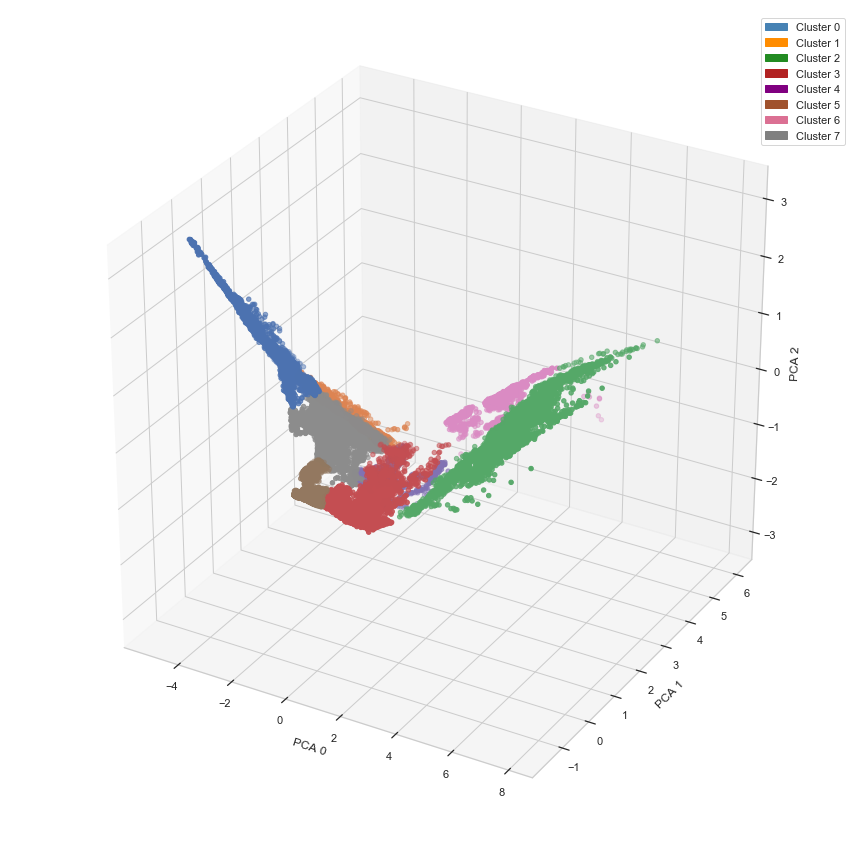

In [59]:
%matplotlib inline

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(encoded_imgs_3d_0)[:,0],np.array(encoded_imgs_3d_0)[:,1],np.array(encoded_imgs_3d_0)[:,2])
ax.scatter(np.array(encoded_imgs_3d_1)[:,0],np.array(encoded_imgs_3d_1)[:,1],np.array(encoded_imgs_3d_1)[:,2])
ax.scatter(np.array(encoded_imgs_3d_2)[:,0],np.array(encoded_imgs_3d_2)[:,1],np.array(encoded_imgs_3d_2)[:,2])
ax.scatter(np.array(encoded_imgs_3d_3)[:,0],np.array(encoded_imgs_3d_3)[:,1],np.array(encoded_imgs_3d_3)[:,2])
ax.scatter(np.array(encoded_imgs_3d_4)[:,0],np.array(encoded_imgs_3d_4)[:,1],np.array(encoded_imgs_3d_4)[:,2])
ax.scatter(np.array(encoded_imgs_3d_5)[:,0],np.array(encoded_imgs_3d_5)[:,1],np.array(encoded_imgs_3d_5)[:,2])
ax.scatter(np.array(encoded_imgs_3d_6)[:,0],np.array(encoded_imgs_3d_6)[:,1],np.array(encoded_imgs_3d_6)[:,2])
ax.scatter(np.array(encoded_imgs_3d_7)[:,0],np.array(encoded_imgs_3d_7)[:,1],np.array(encoded_imgs_3d_7)[:,2])

blue = mpatches.Patch(color=palette[0], label='Cluster 0')
orange = mpatches.Patch(color=palette[1], label='Cluster 1')
green = mpatches.Patch(color=palette[2], label='Cluster 2')
red = mpatches.Patch(color=palette[3], label='Cluster 3')
purple = mpatches.Patch(color=palette[4], label='Cluster 4')
brown = mpatches.Patch(color=palette[5], label='Cluster 5')
pink = mpatches.Patch(color=palette[6], label='Cluster 6')
grey = mpatches.Patch(color=palette[7], label='Cluster 7')

ax.set_xlabel('PCA 0')
ax.set_ylabel('PCA 1')
ax.set_zlabel('PCA 2')
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])

In [60]:
df_ac_clustering_3 = pd.DataFrame({'Timestamp':epoch_all,'ac_clustering_x':encoded_imgs_3d[:,0], 'ac_clustering_y':encoded_imgs_3d[:,1], 'ac_clustering_z':encoded_imgs_3d[:,2]})
df_ac_clustering_3['key_ac_clustering'] = ac_clustering_3
df_ac_clustering_3['ac_results'] = ac_clustering_3

In [61]:
Counter(df_ac_clustering_3['key_ac_clustering'])

Counter({7: 8077,
         1: 3074,
         5: 18025,
         0: 6549,
         4: 2097,
         6: 1029,
         2: 5092,
         3: 5778})

In [62]:
# for i in range(len(epoch_all)):
#     print(i,' ',epoch_all[i],' ',ac_clustering_3[i])

In [63]:
a = np.full(26606-(-1),0) #PS
b = np.full(29616-26606,2) #Lobe
c = np.full(33475-29616,1) #BR
d = np.full(35719-33475,2) #Lobe
e = np.full(39333-35719,1) #BR
f = np.full(49720-39333,2) #Lobe

eclat_labels = np.concatenate((a,b,c,d,e,f))
df_eclat = pd.DataFrame({'eclat':eclat_labels})

# df_ac_clustering_3['ac_results'] = df_ac_clustering_3['ac_results'].replace(1,0)
# df_ac_clustering_3['ac_results'] = df_ac_clustering_3['ac_results'].replace(4,0)
# df_ac_clustering_3['ac_results'] = df_ac_clustering_3['ac_results'].replace(7,0)
# df_ac_clustering_3['ac_results'] = df_ac_clustering_3['ac_results'].replace(2,0)
# df_ac_clustering_3['ac_results'] = df_ac_clustering_3['ac_results'].replace(6,0)
# df_ac_clustering_3['ac_results'] = df_ac_clustering_3['ac_results'].replace(3,1)
# df_ac_clustering_3['ac_results'] = df_ac_clustering_3['ac_results'].replace(5,2)

print(Counter(df_ac_clustering_3['ac_results']))

pd.crosstab(df_ac_clustering_3['ac_results'],df_eclat['eclat'])

Counter({5: 18025, 7: 8077, 0: 6549, 3: 5778, 2: 5092, 1: 3074, 4: 2097, 6: 1029})


eclat          0     1      2
ac_results                   
0           6549     0      0
1           3074     0      0
2           5092     0      0
3           1590  4188      0
4           2097     0      0
5            156  2228  15641
6           1029     0      0
7           7020  1057      0

In [64]:
data_all_0 = []
data_all_1 = []
data_all_2 = []
data_all_3 = []
data_all_4 = []
data_all_5 = []
data_all_6 = []
data_all_7 = []

for i in range(len(ac_clustering_3)):
    if ac_clustering_3[i] == 0:
        data_all_0.append(data_all[i,0:len(pa4),0:26])
    if ac_clustering_3[i] == 1:
        data_all_1.append(data_all[i,0:len(pa4),0:26])
    if ac_clustering_3[i] == 2:
        data_all_2.append(data_all[i,0:len(pa4),0:26])
    if ac_clustering_3[i] == 3:
        data_all_3.append(data_all[i,0:len(pa4),0:26])
    if ac_clustering_3[i] == 4:
        data_all_4.append(data_all[i,0:len(pa4),0:26])
    if ac_clustering_3[i] == 5:
        data_all_5.append(data_all[i,0:len(pa4),0:26])
    if ac_clustering_3[i] == 6:
        data_all_6.append(data_all[i,0:len(pa4),0:26])
    if ac_clustering_3[i] == 7:
        data_all_7.append(data_all[i,0:len(pa4),0:26])
        
data_all_0_mean = np.mean(data_all_0[:],axis=0)
data_all_1_mean = np.mean(data_all_1[:],axis=0)
data_all_2_mean = np.mean(data_all_2[:],axis=0)
data_all_3_mean = np.mean(data_all_3[:],axis=0)
data_all_4_mean = np.mean(data_all_4[:],axis=0)
data_all_5_mean = np.mean(data_all_5[:],axis=0)
data_all_6_mean = np.mean(data_all_6[:],axis=0)
data_all_7_mean = np.mean(data_all_7[:],axis=0)
all_data_means = (data_all_0_mean,data_all_1_mean,data_all_2_mean,data_all_3_mean,data_all_4_mean,data_all_5_mean,data_all_6_mean,data_all_7_mean)


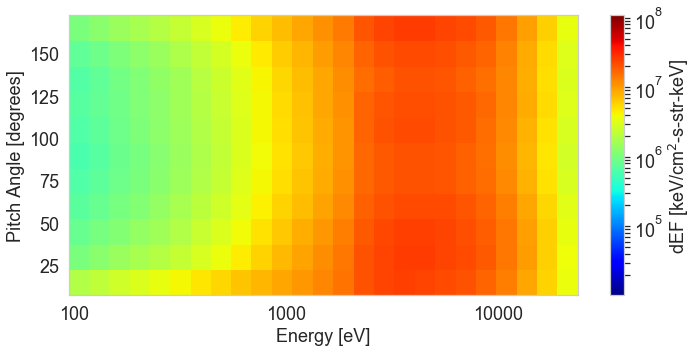

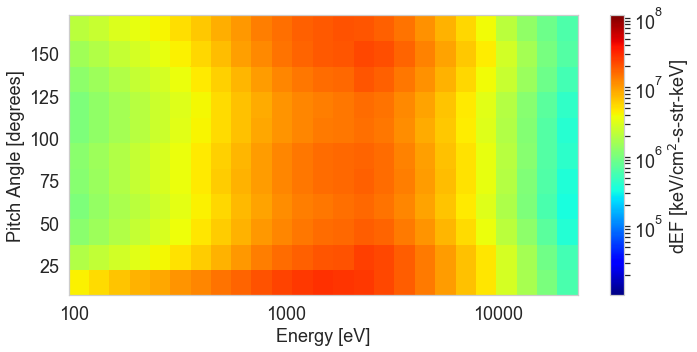

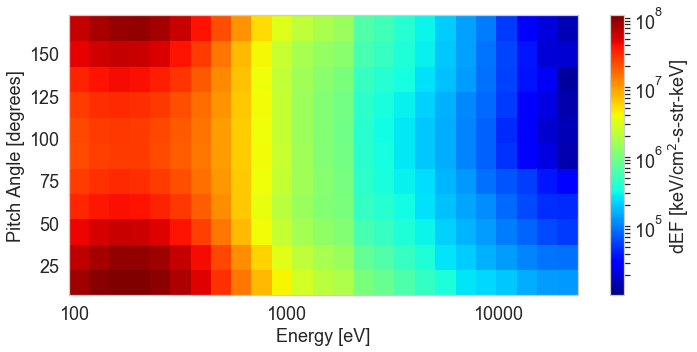

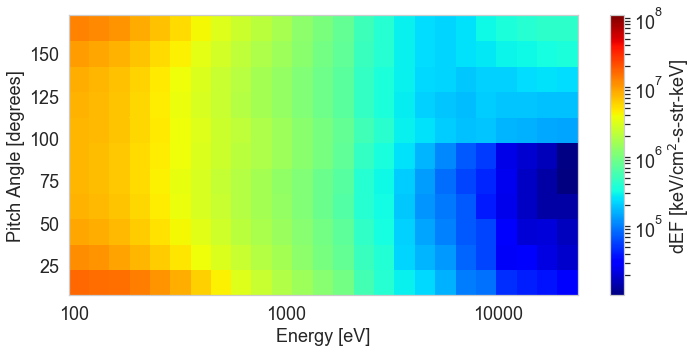

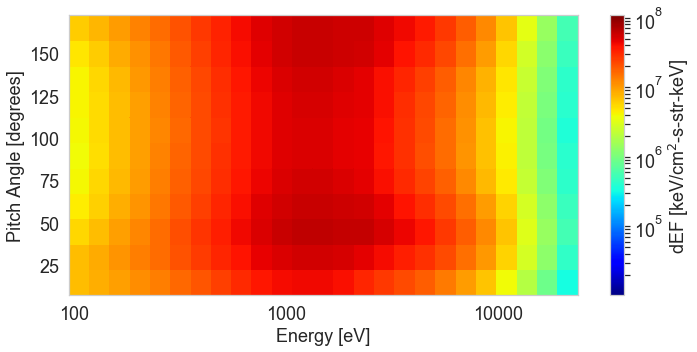

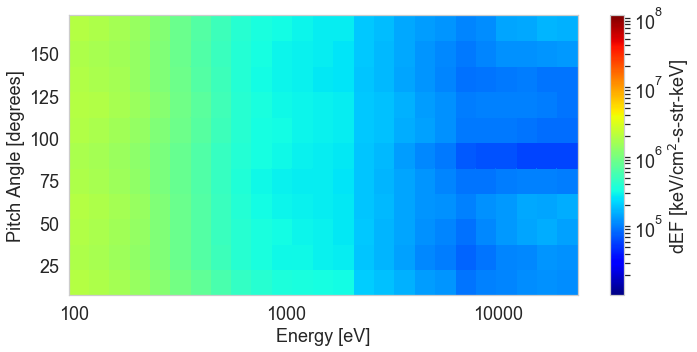

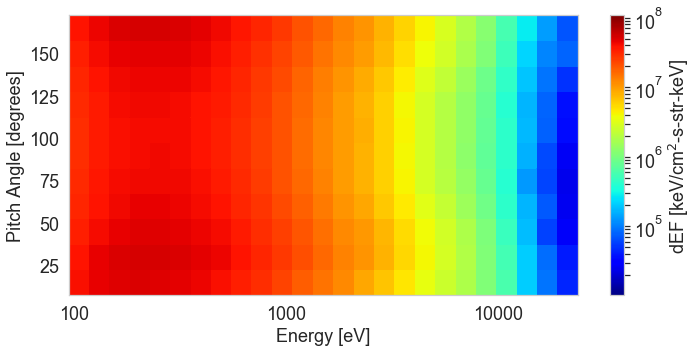

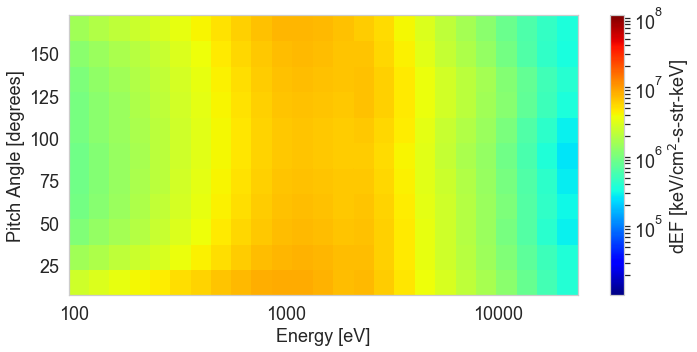

In [65]:
# average 2d plotting by cluster:
for i in range(len(all_data_means)):
    X, Y = np.meshgrid(energy4[0,0:26],pa4)
    fig = plt.figure(figsize=(10,5))
    ax = plt.axes()
    D = (all_data_means[i][0:len(pa4),0:26])
    vmin, vmax = np.min(all_data_means[:]), np.max(all_data_means[:])
    levels = np.linspace(vmin,vmax,10)
    surf = ax.pcolormesh((X), Y, D, cmap=cm.jet,norm=LogNorm(vmin,vmax))
    #surf = ax.contourf((X), Y, D, 100, cmap=cm.jet)
    cbar = fig.colorbar(surf)
    cbar.set_label('dEF [keV/cm$^{2}$-s-str-keV]',fontsize=18) ####Particle or Energy Flux
    cbar.ax.tick_params(labelsize=18)
    ax.set_ylabel('Pitch Angle [degrees]',fontsize=18)
    ax.set_xlabel('Energy [eV]',fontsize=18)
    ax.set_xscale('log')
    #ax.set_title('Cluster '+str(i),fontsize=18)
    ax.tick_params(labelsize=18)

    #ax.set_xticks([50, 100, 200, 300, 400, 500])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #ax.set_xlim(0,5)
    plt.tight_layout()
    plt.show()

0 = Hot PS (hot plasma sheet)

1 = Intermediate PS a

2 = CD PS a (cold dense plasma sheet)

3 = PSBL 

4 = Intermediate PS b

5 = Lobe

6 = CD PS b

7 = CS (current sheet)

In [66]:
# find energy bin with max flux for each cluster

peak_0 = []
peak_1 = []
peak_2 = []
peak_3 = []
peak_4 = []
peak_5 = []
peak_6 = []
peak_7 = []

for i in range(len(epoch_all)):
    if ac_clustering_3[i] == 0:
        peak_0.append(np.median(np.argmax(data_all[i,:],axis=1)))
    elif ac_clustering_3[i] == 1:
        peak_1.append(np.median(np.argmax(data_all[i,:],axis=1)))
    elif ac_clustering_3[i] == 2:
        peak_2.append(np.median(np.argmax(data_all[i,:],axis=1)))
    elif ac_clustering_3[i] == 3:
        peak_3.append(np.median(np.argmax(data_all[i,:],axis=1)))
    elif ac_clustering_3[i] == 4:
        peak_4.append(np.median(np.argmax(data_all[i,:],axis=1)))
    elif ac_clustering_3[i] == 5:
        peak_5.append(np.median(np.argmax(data_all[i,:],axis=1)))
    elif ac_clustering_3[i] == 6:
        peak_6.append(np.median(np.argmax(data_all[i,:],axis=1)))
    elif ac_clustering_3[i] == 7:
        peak_7.append(np.median(np.argmax(data_all[i,:],axis=1)))

In [67]:
print(int(np.mean(peak_0)),int(np.mean(peak_1)),int(np.mean(peak_2)),int(np.mean(peak_3)),int(np.mean(peak_4)),int(np.mean(peak_5)),int(np.mean(peak_6)),int(np.mean(peak_7)))
print(energy4[0,int(np.mean(peak_0))],energy4[0,int(np.mean(peak_1))],energy4[0,int(np.mean(peak_2))],energy4[0,int(np.mean(peak_3))],energy4[0,int(np.mean(peak_4))],energy4[0,int(np.mean(peak_5))],energy4[0,int(np.mean(peak_6))],energy4[0,int(np.mean(peak_7))])


6 10 21 23 12 22 20 11
6283.9 2588.8 226.28 145.8 1661.7 181.54 282.98 2071.7


In [68]:
# find pa bin with max flux for each cluster

pa_peak_0 = []
pa_peak_1 = []
pa_peak_2 = []
pa_peak_3 = []
pa_peak_4 = []
pa_peak_5 = []
pa_peak_6 = []
pa_peak_7 = []

for i in range(len(epoch_all)):
    if ac_clustering_3[i] == 0:
        pa_peak_0.append((np.unravel_index(data_all[i].argmax(), data_all[i].shape))[0])
    if ac_clustering_3[i] == 1:
        pa_peak_1.append((np.unravel_index(data_all[i].argmax(), data_all[i].shape))[0])
    if ac_clustering_3[i] == 2:
        pa_peak_2.append((np.unravel_index(data_all[i].argmax(), data_all[i].shape))[0])
    if ac_clustering_3[i] == 3:
        pa_peak_3.append((np.unravel_index(data_all[i].argmax(), data_all[i].shape))[0])
    if ac_clustering_3[i] == 4:
        pa_peak_4.append((np.unravel_index(data_all[i].argmax(), data_all[i].shape))[0])
    if ac_clustering_3[i] == 5:
        pa_peak_5.append((np.unravel_index(data_all[i].argmax(), data_all[i].shape))[0])
    if ac_clustering_3[i] == 6:
        pa_peak_6.append((np.unravel_index(data_all[i].argmax(), data_all[i].shape))[0])
    if ac_clustering_3[i] == 7:
        pa_peak_7.append((np.unravel_index(data_all[i].argmax(), data_all[i].shape))[0])

In [69]:
print(pa1[int(np.mean(pa_peak_0))],pa1[int(np.mean(pa_peak_1))],pa1[int(np.mean(pa_peak_2))],pa1[int(np.mean(pa_peak_3))],pa1[int(np.mean(pa_peak_4))],pa1[int(np.mean(pa_peak_5))],pa1[int(np.mean(pa_peak_6))],pa1[int(np.mean(pa_peak_7))])
print(pa1[int(np.median(pa_peak_0))],pa1[int(np.median(pa_peak_1))],pa1[int(np.median(pa_peak_2))],pa1[int(np.median(pa_peak_3))],pa1[int(np.median(pa_peak_4))],pa1[int(np.median(pa_peak_5))],pa1[int(np.median(pa_peak_6))],pa1[int(np.median(pa_peak_7))])


82.5 67.5 52.5 97.5 67.5 82.5 82.5 82.5
97.5 67.5 22.5 142.5 37.5 97.5 52.5 82.5


In [70]:
# find how ratio of peak parallel to peak perpendicular flux compares for each class

ratio_0 = []
ratio_1 = []
ratio_2 = []
ratio_3 = []
ratio_4 = []
ratio_5 = []
ratio_6 = []
ratio_7 = []

for i in range(len(epoch_all)):
    peak_en = (np.unravel_index(data_all[i].argmax(), data_all[i].shape))[1]
    if ac_clustering_3[i] == 0:
        ratio_0.append(data_all[i,0,peak_en]/data_all[i,6,peak_en])
    if ac_clustering_3[i] == 1:
        ratio_1.append(data_all[i,0,peak_en]/data_all[i,6,peak_en])
    if ac_clustering_3[i] == 2:
        ratio_2.append(data_all[i,0,peak_en]/data_all[i,6,peak_en])
    if ac_clustering_3[i] == 3:
        ratio_3.append(data_all[i,0,peak_en]/data_all[i,6,peak_en])
    if ac_clustering_3[i] == 4:
        ratio_4.append(data_all[i,0,peak_en]/data_all[i,6,peak_en])
    if ac_clustering_3[i] == 5:
        ratio_5.append(data_all[i,0,peak_en]/data_all[i,6,peak_en])
    if ac_clustering_3[i] == 6:
        ratio_6.append(data_all[i,0,peak_en]/data_all[i,6,peak_en])
    if ac_clustering_3[i] == 7:
        ratio_7.append(data_all[i,0,peak_en]/data_all[i,6,peak_en])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


In [71]:
print(np.median(ratio_0),np.median(ratio_1),np.median(ratio_2),np.median(ratio_3),np.median(ratio_4),np.median(ratio_5),np.median(ratio_6),np.median(ratio_7))


1.019457735247209 1.7208568296765194 4.1109850537389425 1.4169075510959235 0.7999683118117722 nan 1.13806207760728 1.2757799225770288


In [72]:
# find how ratio of peak parallel to peak anti-parallel flux compares for each class

par_ratio_0 = []
par_ratio_1 = []
par_ratio_2 = []
par_ratio_3 = []
par_ratio_4 = []
par_ratio_5 = []
par_ratio_6 = []
par_ratio_7 = []

for i in range(len(epoch_all)):
    peak_en = (np.unravel_index(data_all[i].argmax(), data_all[i].shape))[1]
    if ac_clustering_3[i] == 0:
        par_ratio_0.append(data_all[i,0,peak_en]/data_all[i,11,peak_en])
    if ac_clustering_3[i] == 1:
        par_ratio_1.append(data_all[i,0,peak_en]/data_all[i,11,peak_en])
    if ac_clustering_3[i] == 2:
        par_ratio_2.append(data_all[i,0,peak_en]/data_all[i,11,peak_en])
    if ac_clustering_3[i] == 3:
        par_ratio_3.append(data_all[i,0,peak_en]/data_all[i,11,peak_en])
    if ac_clustering_3[i] == 4:
        par_ratio_4.append(data_all[i,0,peak_en]/data_all[i,11,peak_en])
    if ac_clustering_3[i] == 5:
        par_ratio_5.append(data_all[i,0,peak_en]/data_all[i,11,peak_en])
    if ac_clustering_3[i] == 6:
        par_ratio_6.append(data_all[i,0,peak_en]/data_all[i,11,peak_en])
    if ac_clustering_3[i] == 7:
        par_ratio_7.append(data_all[i,0,peak_en]/data_all[i,11,peak_en])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


In [73]:
print(np.median(par_ratio_0),np.median(par_ratio_1),np.median(par_ratio_2),np.median(par_ratio_3),np.median(par_ratio_4),np.median(par_ratio_5),np.median(par_ratio_6),np.median(par_ratio_7))
# negligible difference between median and mean

0.9984071677451468 1.339094091355355 1.0457943363999735 0.9203052930193973 0.8924573935541932 nan 1.0097160298512233 0.8396206824946356


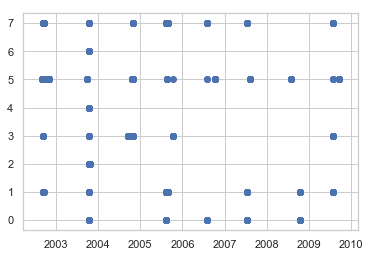

In [74]:
#plt.scatter(np.arange(0,len(epoch_all)),y_s_clustering)
plt.scatter(epoch_all,ac_clustering_3)

# Parameters

In [75]:
k_b = 1.38e-23 #m^2 kg s^-2 K^-1
mu_0 = 1.26e-6 #m kg s^-2 A^-2

In [76]:
times = (('2002','09','20','17','40','03','2002','09','20','19','15','46'),
         ('2002','09','13','13','11','22','2002','09','13','14','22','53'),
         ('2005','08','07','10','48','33','2005','08','07','12','32','36'),
         ('2005','08','28','16','18','37','2005','08','28','18','00','27'),
         ('2003','10','13','07','58','30','2003','10','13','11','32','07'),
        ('2003','10','18','04','54','33','2003','10','18','07','54','02'),
        ('2003','10','11','05','04','17','2003','10','11','06','13','28'),
        ('2007','07','17','10','39','13','2007','07','17','12','26','36'),
        ('2007','07','17','07','06','32','2007','07','17','08','32','45'),
        ('2003','10','23','08','12','41','2003','10','23','13','52','11'),
        ('2005','08','10','02','15','18','2005','08','10','03','21','29'),
        ('2008','10','16','00','36','41','2008','10','16','01','44','28'),
        ('2004','09','12','15','25','47','2004','09','12','16','27','14'),
        ('2006','08','04','05','20','38','2006','08','04','08','20','59'),
        ('2009','07','29','00','00','07','2009','07','29','01','03','52'),
        ('2002', '09', '01', '08', '49', '32','2002', '09', '01', '12', '10', '44'),
        ('2002', '09', '08', '14', '17', '19','2002', '09', '08', '17', '15', '48'),
        ('2002', '10', '29', '05', '31', '24','2002', '10', '29', '06', '51', '05'),
        ('2003', '09', '29', '02', '38', '25','2003', '09', '29', '05', '07', '01'),
        ('2004', '10', '22', '11', '54', '08','2004', '10', '22', '13', '12', '09'),
        ('2004', '10', '25', '15', '55', '02','2004', '10', '25', '17', '29', '19'),
        ('2005', '10', '12', '21', '03', '33','2005', '10', '12', '21', '04', '31'),
        ('2005', '08', '17', '13', '31', '44','2005', '08', '17', '14', '48', '09'),
        ('2006', '10', '07', '00', '00', '05','2006', '10', '07', '02', '48', '35'),
        ('2007', '08', '06', '17', '07', '06','2007', '08', '06', '19', '58', '28'),
        ('2008', '07', '26', '02', '27', '41','2008', '07', '26', '05', '53', '30'),
        ('2009', '09', '15', '12', '59', '53','2009', '09', '15', '15', '48', '48'))

In [77]:
epoch_fgm = []
B_vec_fgm = []
B_x_fgm = []
B_z_fgm = []
B_mag_fgm = []
pos_fgm = []
pos_x_fgm = []
pos_z_fgm = []

for i in range(len(times)):
    
    stamp = times[i][0]+times[i][1]+times[i][2]+'_'+times[i][3]+times[i][4]+times[i][5]+'_'+times[i][6]+times[i][7]+times[i][8]+'_'+times[i][9]+times[i][10]+times[i][11]
    
    cdf_fgm = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_FGM_SPIN__'+stamp+'_V140305')
    
    epoch_fgm.append(cdf_fgm[0][...])
    B_vec_fgm.append(cdf_fgm[2][...])
    B_x_fgm.append(cdf_fgm[2][...][:,0])
    B_z_fgm.append(cdf_fgm[2][...][:,2])
    B_mag_fgm.append(cdf_fgm[3][...])
    pos_fgm.append(cdf_fgm[4][...])
    pos_x_fgm.append(cdf_fgm[4][...][:,0])
    pos_z_fgm.append(cdf_fgm[4][...][:,2])

In [78]:
all_epoch_fgm = []
all_B_vec_fgm = []
all_B_x_fgm = []
all_B_z_fgm = []
all_B_mag_fgm = []
all_pos_fgm = []
all_pos_x_fgm = []
all_pos_z_fgm = []

for i in range(len(epoch_fgm)):
    for j in range(len(epoch_fgm[i])):
        all_epoch_fgm.append(epoch_fgm[i][j])
        all_B_vec_fgm.append(B_vec_fgm[i][j])
        all_B_x_fgm.append(B_x_fgm[i][j])
        all_B_z_fgm.append(B_z_fgm[i][j])
        all_B_mag_fgm.append(B_mag_fgm[i][j])
        all_pos_fgm.append(pos_fgm[i][j]/6371.)
        all_pos_x_fgm.append(pos_x_fgm[i][j]/6371.)
        all_pos_z_fgm.append(pos_z_fgm[i][j]/6371.)

In [79]:
df_fgm = pd.DataFrame({'Timestamp':all_epoch_fgm, 'B_mag':all_B_mag_fgm, 'B_vec':all_B_vec_fgm, 'B_pos':all_pos_fgm, 'B_pos_x':all_pos_x_fgm, 'B_pos_z':all_pos_z_fgm, 'B_x':all_B_x_fgm, 'B_z':all_B_z_fgm})
df_fgm = df_fgm.sort_values(by='Timestamp')

In [80]:
epoch_cis = []
density_cis = [] #cm-3
T_cis = [] #MK then converted to eV

for i in range(len(times)):
    
    stamp = times[i][0]+times[i][1]+times[i][2]+'_'+times[i][3]+times[i][4]+times[i][5]+'_'+times[i][6]+times[i][7]+times[i][8]+'_'+times[i][9]+times[i][10]+times[i][11]
    
    #remember .cdf 
    file = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_CIS-CODIF_HS_H1_MOMENTS__'+stamp+'_V080213.cdf'
    file1 = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_CIS-CODIF_HS_H1_MOMENTS__'+stamp+'_V130131.cdf'
    file2 = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_CIS-CODIF_HS_H1_MOMENTS__'+stamp+'_V081210.cdf'
    file3 = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_CIS-CODIF_HS_H1_MOMENTS__'+stamp+'_V100518.cdf'
    file4 = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_CIS-CODIF_HS_H1_MOMENTS__'+stamp+'_V110922.cdf'

    if os.path.exists(file):
        cdf_cis = pycdf.CDF(file)
    elif os.path.exists(file1):
        cdf_cis = pycdf.CDF(file1)
    elif os.path.exists(file2):
        cdf_cis = pycdf.CDF(file2)
    elif os.path.exists(file3):
        cdf_cis = pycdf.CDF(file3)
    elif os.path.exists(file4):
        cdf_cis = pycdf.CDF(file4)
    
    epoch_cis.append(cdf_cis[0][...])
    density_cis.append(cdf_cis[1][...])
    T_cis.append(cdf_cis[5][...])

In [81]:
all_epoch_cis = []
all_density_cis = []
all_T_cis = []

for i in range(len(epoch_cis)):
    for j in range(len(epoch_cis[i])):
        all_epoch_cis.append(epoch_cis[i][j])
        all_density_cis.append(density_cis[i][j])
        all_T_cis.append(T_cis[i][j]*86.21738)

In [82]:
df_cis = pd.DataFrame({'Timestamp':all_epoch_cis, 'density':all_density_cis, 'T':all_T_cis})
df_cis = df_cis.sort_values(by='Timestamp')

In [83]:
# merge CIS and FGM data into one dataframe based on timestamp
df_fgm['Timestamp'] = pd.to_datetime(df_fgm['Timestamp'])
df_cis['Timestamp'] = pd.to_datetime(df_cis['Timestamp'])
df_merge = pd.merge_asof(df_cis, df_fgm, on='Timestamp')
# calculate proton plasma beta
plasma_beta = (df_merge['density']*(100**3)*k_b*(df_merge['T']*(10**6)/86.21738))/(((df_merge['B_mag']*(10**-9))**2)/(2*mu_0))
df_merge['plasma_beta'] = plasma_beta

In [84]:
#merge AC clustering labels and parameters
df_ac_clustering = df_ac_clustering_3.sort_values(by='Timestamp')
df_ac_clustering['Timestamp'] = pd.to_datetime(df_ac_clustering['Timestamp'])

df_merge_v2 = pd.merge_asof(df_merge, df_ac_clustering, on='Timestamp')

y2 = (df_merge_v2[df_merge_v2['Timestamp'].dt.year==2002].index)[0]
y3 = (df_merge_v2[df_merge_v2['Timestamp'].dt.year==2003].index)[0]
y4 = (df_merge_v2[df_merge_v2['Timestamp'].dt.year==2004].index)[0]
y5 = (df_merge_v2[df_merge_v2['Timestamp'].dt.year==2005].index)[0]
y6 = (df_merge_v2[df_merge_v2['Timestamp'].dt.year==2006].index)[0]
y7 = (df_merge_v2[df_merge_v2['Timestamp'].dt.year==2007].index)[0]
y8 = (df_merge_v2[df_merge_v2['Timestamp'].dt.year==2008].index)[0]
y9 = (df_merge_v2[df_merge_v2['Timestamp'].dt.year==2009].index)[0]

In [85]:
print(Counter(df_merge_v2['key_ac_clustering']))
print(len(df_merge_v2))

Counter({5: 9020, 7: 4031, 0: 3272, 3: 2886, 2: 2548, 1: 1550, 4: 1050, 6: 517})
24874


In [86]:
blue = mpatches.Patch(color=palette[0], label='Hot PS')
orange = mpatches.Patch(color=palette[1], label='Intermediate PS a')
green = mpatches.Patch(color=palette[2], label='CD PS a')
red = mpatches.Patch(color=palette[3], label='PSBL')
purple = mpatches.Patch(color=palette[4], label='Intermediate PS b')
brown = mpatches.Patch(color=palette[5], label='Lobe')
pink = mpatches.Patch(color=palette[6], label='CD PS b')
grey = mpatches.Patch(color=palette[7], label='CS')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


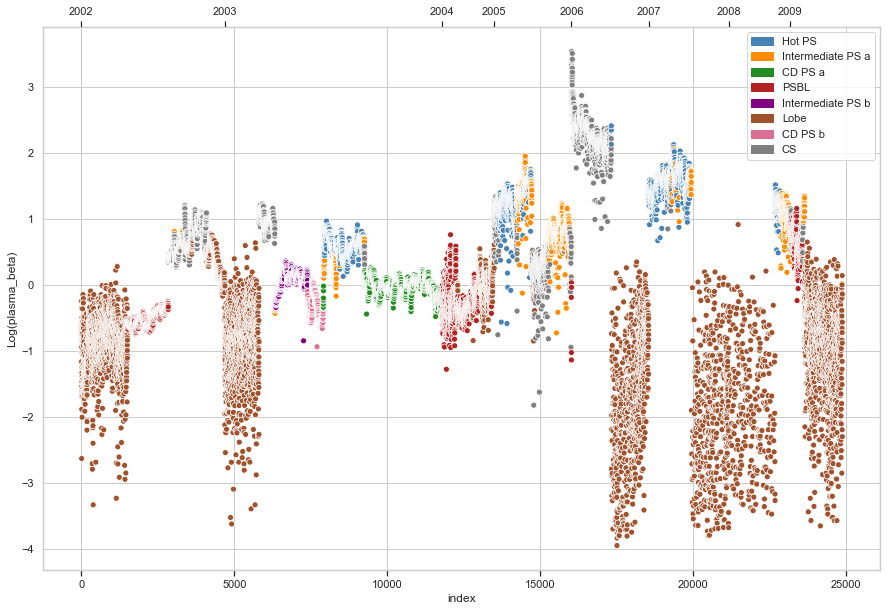

In [87]:
##plasma beta
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_merge_v2.index, y=np.log10(df_merge_v2["plasma_beta"]), data=df_merge_v2, hue='key_ac_clustering',palette=palette, legend=False)
ax.set(xlabel='index',ylabel='Log(plasma_beta)')
ax2 = ax.twiny()
ax2.set_xbound(ax.get_xbound())
ax2.set_xticks(np.array([y2,y3,y4,y5,y6,y7,y8,y9]))
ax2.set_xticklabels(['2002','2003','2004','2005','2006','2007','2008','2009'])
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
ax2.grid(False)

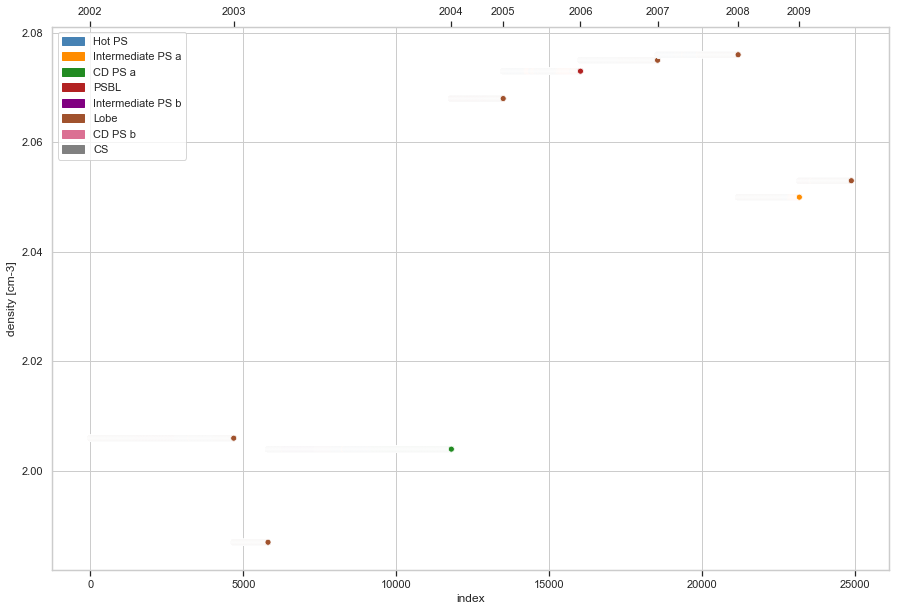

In [88]:
##ion density
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_merge_v2.index, y=df_merge_v2["density"], data=df_merge_v2, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='index',ylabel='density [cm-3]')
ax2 = ax.twiny()
ax2.set_xbound(ax.get_xbound())
ax2.set_xticks(np.array([y2,y3,y4,y5,y6,y7,y8,y9]))
ax2.set_xticklabels(['2002','2003','2004','2005','2006','2007','2008','2009'])
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey],loc='upper left')
ax2.grid(False)

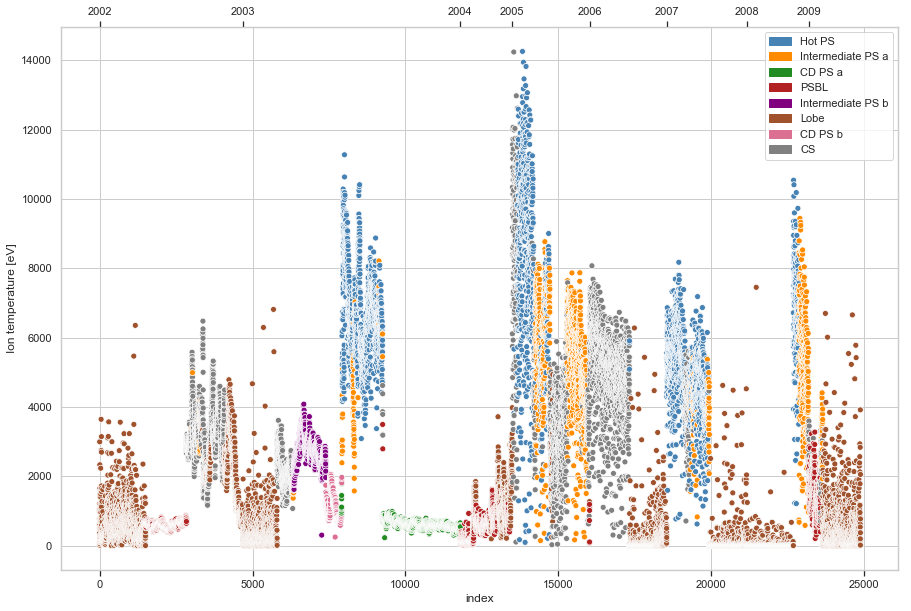

In [89]:
## ion temperature
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_merge_v2.index, y=(df_merge_v2["T"]), data=df_merge_v2, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='index',ylabel='Ion temperature [eV]')
ax2 = ax.twiny()
ax2.set_xbound(ax.get_xbound())
ax2.set_xticks(np.array([y2,y3,y4,y5,y6,y7,y8,y9]))
ax2.set_xticklabels(['2002','2003','2004','2005','2006','2007','2008','2009'])
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
ax2.grid(False)

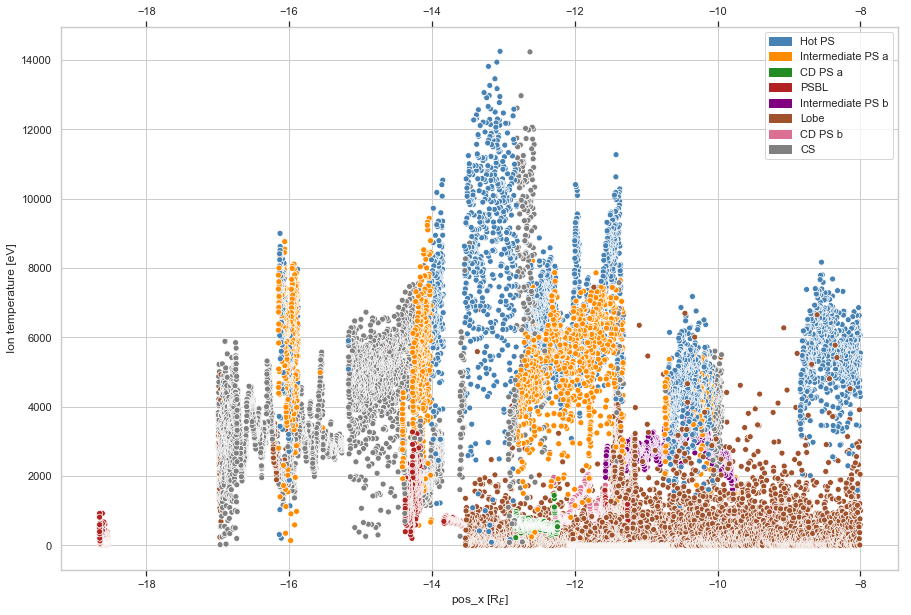

In [90]:
## ion temperature vs pos_x
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_merge_v2['B_pos_x'], y=(df_merge_v2["T"]), data=df_merge_v2, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='pos_x [R$_E$]',ylabel='Ion temperature [eV]')
ax2 = ax.twiny()
ax2.set_xbound(ax.get_xbound())
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
ax2.grid(False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


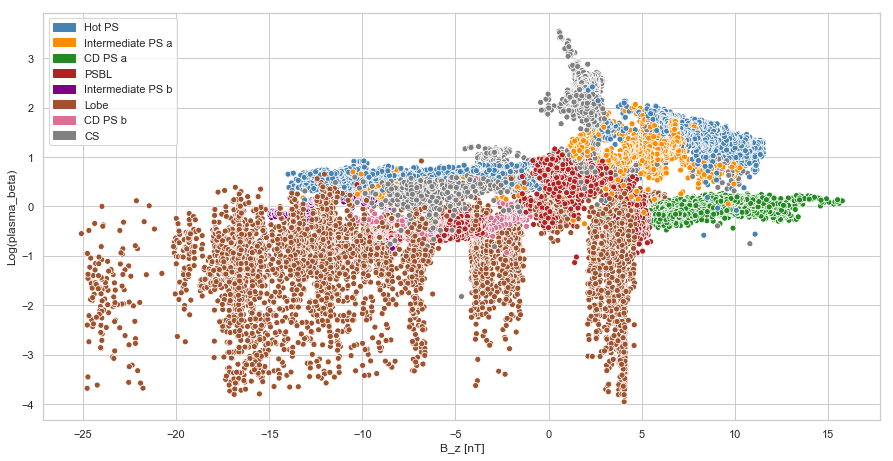

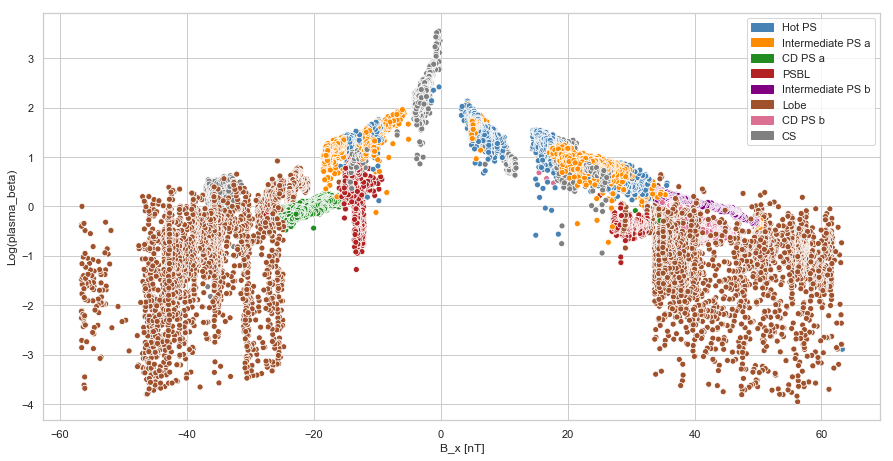

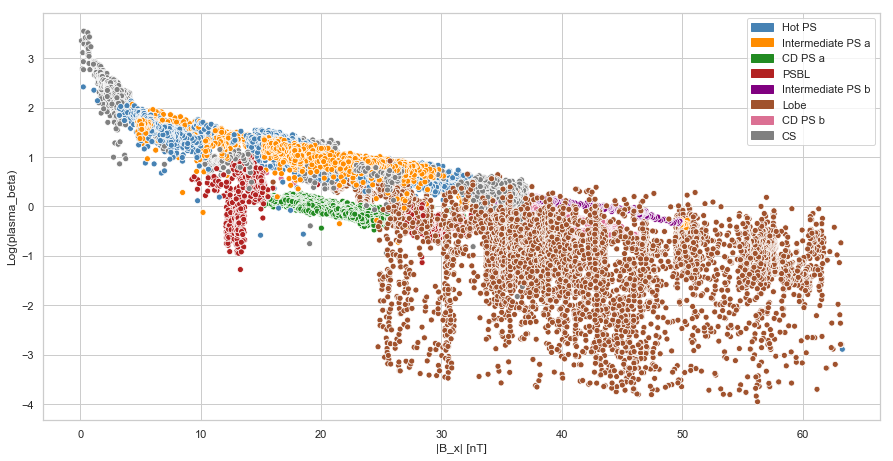

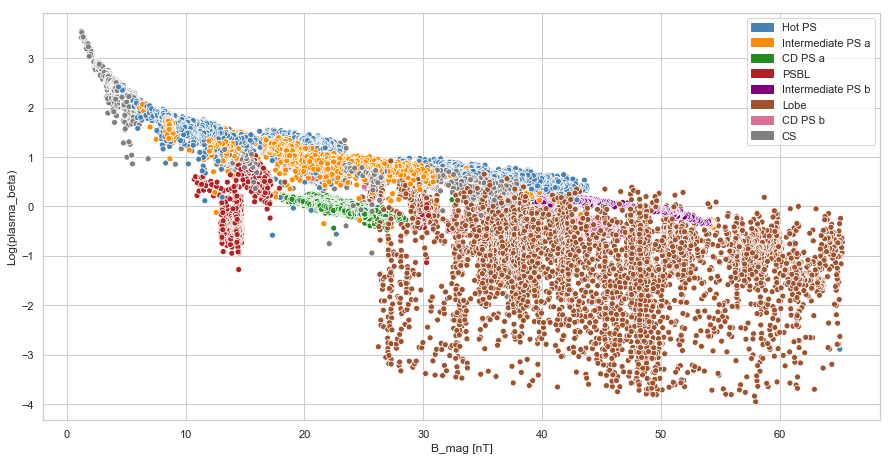

In [107]:
##plasma beta vs B_z
plt.figure(figsize=(15,7.5))
ax = sns.scatterplot(df_merge_v2["B_z"], y=np.log10(df_merge_v2["plasma_beta"]), data=df_merge_v2, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='B_z [nT]',ylabel='Log(plasma_beta)')
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
##plasma beta vs B_x
plt.figure(figsize=(15,7.5))
ax = sns.scatterplot(x=df_merge_v2["B_x"], y=np.log10(df_merge_v2["plasma_beta"]), data=df_merge_v2, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='B_x [nT]',ylabel='Log(plasma_beta)')
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
##plasma beta vs abs(B_x)
plt.figure(figsize=(15,7.5))
ax = sns.scatterplot(x=np.absolute(df_merge_v2["B_x"]), y=np.log10(df_merge_v2["plasma_beta"]), data=df_merge_v2, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='|B_x| [nT]',ylabel='Log(plasma_beta)')
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
##plasma beta vs B_mag
plt.figure(figsize=(15,7.5))
ax = sns.scatterplot(df_merge_v2["B_mag"], y=np.log10(df_merge_v2["plasma_beta"]), data=df_merge_v2, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='B_mag [nT]',ylabel='Log(plasma_beta)')
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])

In [92]:
#merge AC clustering labels and fgm parameters
df_ac_clustering = df_ac_clustering.sort_values(by='Timestamp')
df_ac_clustering['Timestamp'] = pd.to_datetime(df_ac_clustering['Timestamp'])

df_merge_v3 = pd.merge_asof(df_fgm, df_ac_clustering, on='Timestamp')

y2 = (df_merge_v3[df_merge_v3['Timestamp'].dt.year==2002].index)[0]
y3 = (df_merge_v3[df_merge_v3['Timestamp'].dt.year==2003].index)[0]
y4 = (df_merge_v3[df_merge_v3['Timestamp'].dt.year==2004].index)[0]
y5 = (df_merge_v3[df_merge_v3['Timestamp'].dt.year==2005].index)[0]
y6 = (df_merge_v3[df_merge_v3['Timestamp'].dt.year==2006].index)[0]
y7 = (df_merge_v3[df_merge_v3['Timestamp'].dt.year==2007].index)[0]
y8 = (df_merge_v3[df_merge_v3['Timestamp'].dt.year==2008].index)[0]
y9 = (df_merge_v3[df_merge_v3['Timestamp'].dt.year==2009].index)[0]

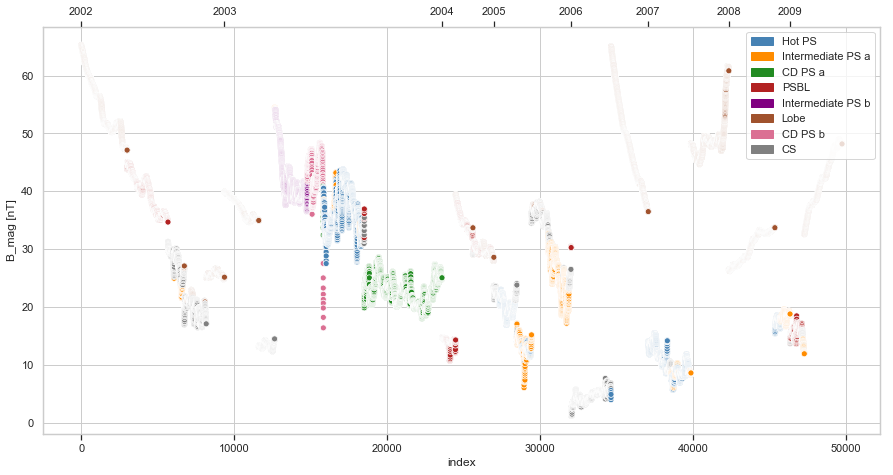

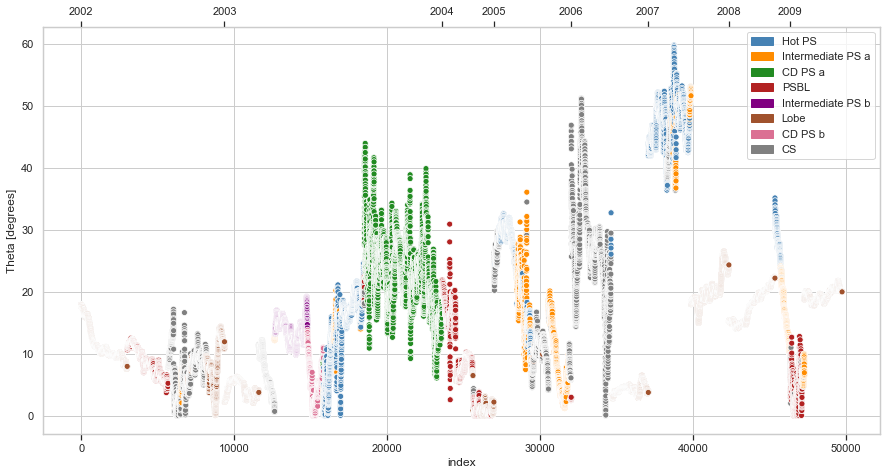

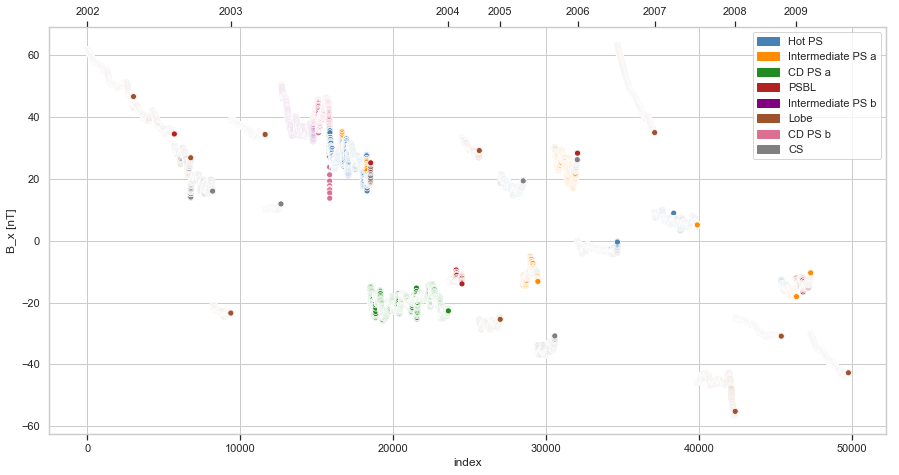

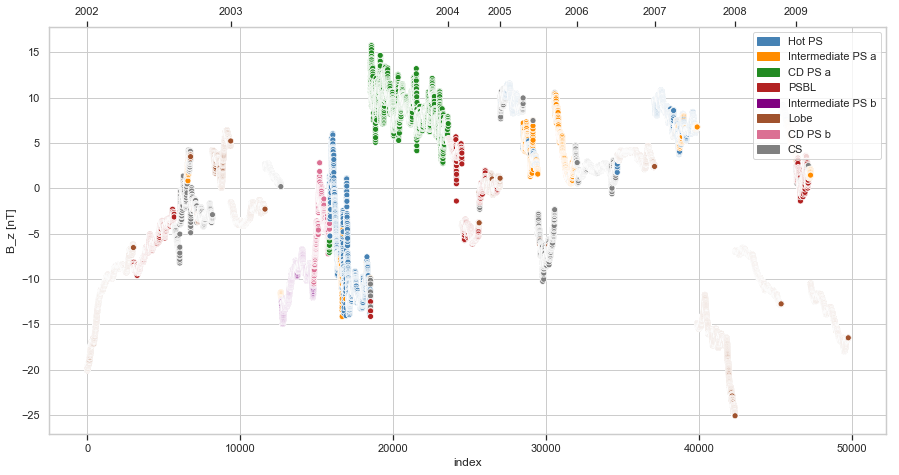

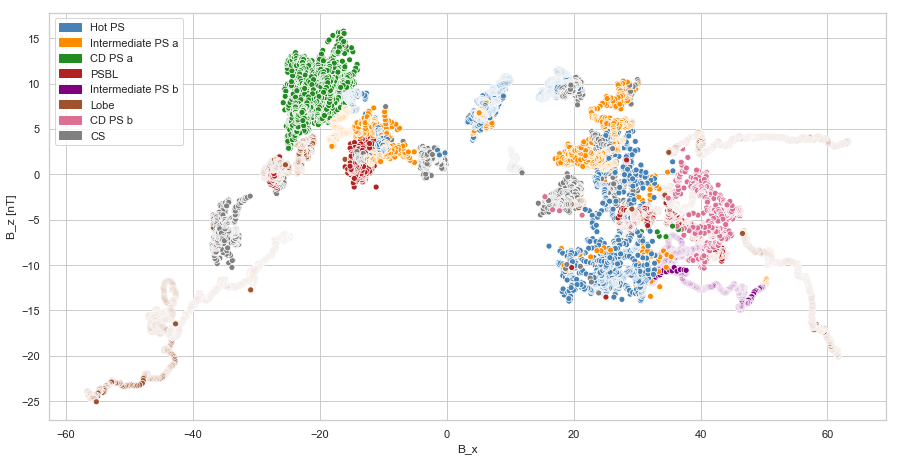

In [93]:
##B_mag
plt.figure(figsize=(15,7.5))
ax = sns.scatterplot(x=df_merge_v3.index, y=df_merge_v3['B_mag'], data=df_merge_v3, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='index',ylabel='B_mag [nT]')
ax2 = ax.twiny()
ax2.set_xbound(ax.get_xbound())
ax2.set_xticks(np.array([y2,y3,y4,y5,y6,y7,y8,y9]))
ax2.set_xticklabels(['2002','2003','2004','2005','2006','2007','2008','2009'])
ax2.grid(False)
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
plt.show()
##Theta abs(arcsin(Bz/B_mag)) [convert to degrees]
plt.figure(figsize=(15,7.5))
ax = sns.scatterplot(x=df_merge_v3.index, y=np.absolute(np.arcsin(df_merge_v3['B_z']/df_merge_v3['B_mag']))*180/np.pi, data=df_merge_v3, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='index',ylabel='Theta [degrees]')
ax2 = ax.twiny()
ax2.set_xbound(ax.get_xbound())
ax2.set_xticks(np.array([y2,y3,y4,y5,y6,y7,y8,y9]))
ax2.set_xticklabels(['2002','2003','2004','2005','2006','2007','2008','2009'])
ax2.grid(False)
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
plt.show()
##B_x
plt.figure(figsize=(15,7.5))
ax = sns.scatterplot(x=df_merge_v3.index, y=df_merge_v3['B_x'], data=df_merge_v3, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='index',ylabel='B_x [nT]')
ax2 = ax.twiny()
ax2.set_xbound(ax.get_xbound())
ax2.set_xticks(np.array([y2,y3,y4,y5,y6,y7,y8,y9]))
ax2.set_xticklabels(['2002','2003','2004','2005','2006','2007','2008','2009'])
ax2.grid(False)
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
plt.show()
##B_z
plt.figure(figsize=(15,7.5))
ax = sns.scatterplot(x=df_merge_v3.index, y=df_merge_v3['B_z'], data=df_merge_v3, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='index',ylabel='B_z [nT]')
ax2 = ax.twiny()
ax2.set_xbound(ax.get_xbound())
ax2.set_xticks(np.array([y2,y3,y4,y5,y6,y7,y8,y9]))
ax2.set_xticklabels(['2002','2003','2004','2005','2006','2007','2008','2009'])
ax2.grid(False)
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
plt.show()
##B_x vs B_z
plt.figure(figsize=(15,7.5))
ax = sns.scatterplot(df_merge_v2["B_x"], df_merge_v2["B_z"], data=df_merge_v2, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='B_x',ylabel='B_z [nT]')
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])

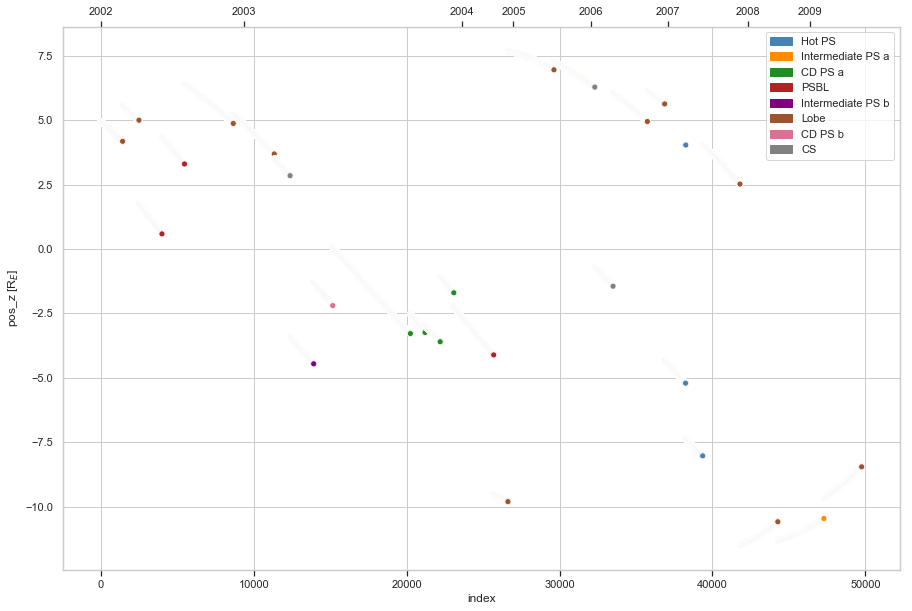

In [94]:
##position
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_merge_v3.index, y=np.array(all_pos_fgm)[:,2], data=df_merge_v3, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='index',ylabel='pos_z [R$_{E}$]')
ax2 = ax.twiny()
ax2.set_xbound(ax.get_xbound())
ax2.set_xticks(np.array([y2,y3,y4,y5,y6,y7,y8,y9]))
ax2.set_xticklabels(['2002','2003','2004','2005','2006','2007','2008','2009'])
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
ax2.grid(False)

In [95]:
all_pos_fgm_0 = []
all_pos_fgm_1 = []
all_pos_fgm_2 = []
all_pos_fgm_3 = []
all_pos_fgm_4 = []
all_pos_fgm_5 = []
all_pos_fgm_6 = []
all_pos_fgm_7 = []

for i in range(len(all_pos_fgm)):
    if df_merge_v3['key_ac_clustering'].iloc[i] == 0:
        all_pos_fgm_0.append(all_pos_fgm[i])
    if df_merge_v3['key_ac_clustering'].iloc[i] == 1:
        all_pos_fgm_1.append(all_pos_fgm[i])
    if df_merge_v3['key_ac_clustering'].iloc[i] == 2:
        all_pos_fgm_2.append(all_pos_fgm[i])
    if df_merge_v3['key_ac_clustering'].iloc[i] == 3:
        all_pos_fgm_3.append(all_pos_fgm[i])
    if df_merge_v3['key_ac_clustering'].iloc[i] == 4:
        all_pos_fgm_4.append(all_pos_fgm[i])
    if df_merge_v3['key_ac_clustering'].iloc[i] == 5:
        all_pos_fgm_5.append(all_pos_fgm[i])
    if df_merge_v3['key_ac_clustering'].iloc[i] == 6:
        all_pos_fgm_6.append(all_pos_fgm[i])
    if df_merge_v3['key_ac_clustering'].iloc[i] == 7:
        all_pos_fgm_7.append(all_pos_fgm[i])
        
        
# all_pos_fgm_0 = np.array(all_pos_fgm_0)/6371.
# all_pos_fgm_1 = np.array(all_pos_fgm_1)/6371.
# all_pos_fgm_2 = np.array(all_pos_fgm_2)/6371.
# all_pos_fgm_3 = np.array(all_pos_fgm_3)/6371.
# all_pos_fgm_4 = np.array(all_pos_fgm_4)/6371.
# all_pos_fgm_5 = np.array(all_pos_fgm_5)/6371.
# all_pos_fgm_6 = np.array(all_pos_fgm_6)/6371.
# all_pos_fgm_7 = np.array(all_pos_fgm_7)/6371.

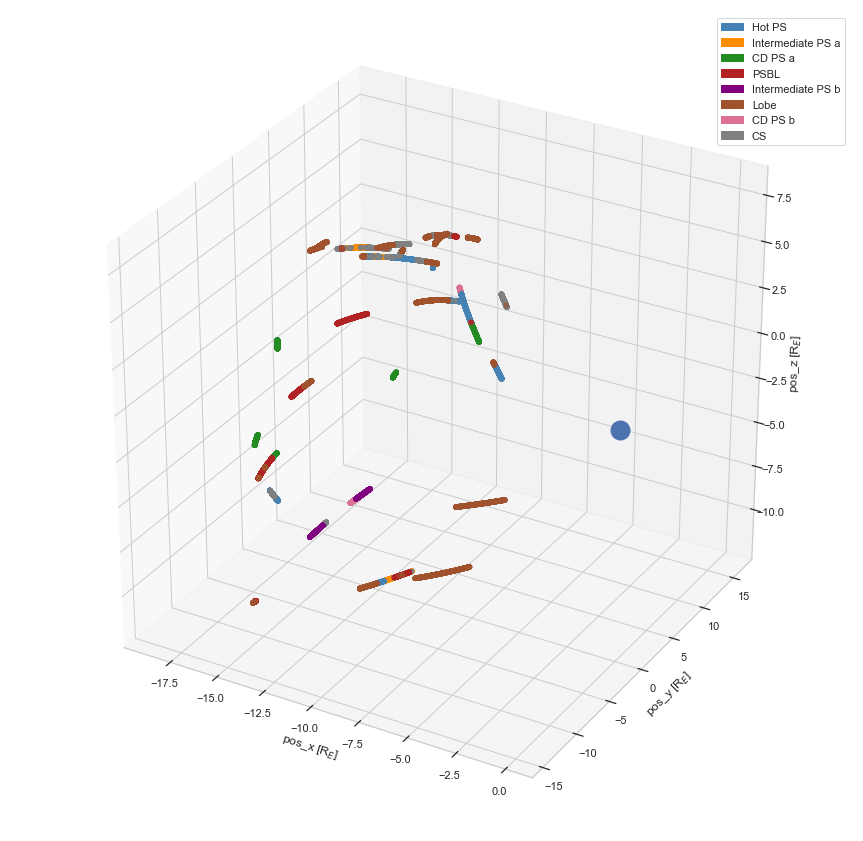

In [96]:
## GSE coordinates

%matplotlib inline

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(all_pos_fgm_0)[:,0],np.array(all_pos_fgm_0)[:,1],np.array(all_pos_fgm_0)[:,2], color=palette[0],s=20)
ax.scatter(np.array(all_pos_fgm_1)[:,0],np.array(all_pos_fgm_1)[:,1],np.array(all_pos_fgm_1)[:,2], color=palette[1],s=20)
ax.scatter(np.array(all_pos_fgm_2)[:,0],np.array(all_pos_fgm_2)[:,1],np.array(all_pos_fgm_2)[:,2], color=palette[2],s=20)
ax.scatter(np.array(all_pos_fgm_3)[:,0],np.array(all_pos_fgm_3)[:,1],np.array(all_pos_fgm_3)[:,2], color=palette[3],s=20)
ax.scatter(np.array(all_pos_fgm_4)[:,0],np.array(all_pos_fgm_4)[:,1],np.array(all_pos_fgm_4)[:,2], color=palette[4],s=20)
ax.scatter(np.array(all_pos_fgm_5)[:,0],np.array(all_pos_fgm_5)[:,1],np.array(all_pos_fgm_5)[:,2], color=palette[5],s=20)
ax.scatter(np.array(all_pos_fgm_6)[:,0],np.array(all_pos_fgm_6)[:,1],np.array(all_pos_fgm_6)[:,2], color=palette[6],s=20)
ax.scatter(np.array(all_pos_fgm_7)[:,0],np.array(all_pos_fgm_7)[:,1],np.array(all_pos_fgm_7)[:,2], color=palette[7],s=20)
ax.scatter(0,0,0,s=360)
ax.set_xlabel('pos_x [R$_{E}$]')
ax.set_ylabel('pos_y [R$_{E}$]')
ax.set_zlabel('pos_z [R$_{E}$]')

plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])

In [97]:
epoch_pea = []
density_pea = []
T_par_pea = [] #mK then convert to eV
T_perp_pea = [] #mK then convert to eV

for i in range(len(times)):
    
    stamp = times[i][0]+times[i][1]+times[i][2]+'_'+times[i][3]+times[i][4]+times[i][5]+'_'+times[i][6]+times[i][7]+times[i][8]+'_'+times[i][9]+times[i][10]+times[i][11]
    
    #remember .cdf 
    file = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_MOMENTS__'+stamp+'_V140315.cdf'
    file1 = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_MOMENTS__'+stamp+'_V190306.cdf'
    file2 = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_MOMENTS__'+stamp+'_V190319.cdf'
    file3 = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_MOMENTS__'+stamp+'_V190326.cdf'

    if os.path.exists(file):
        cdf_pea = pycdf.CDF(file)
    elif os.path.exists(file1):
        cdf_pea = pycdf.CDF(file1)
    elif os.path.exists(file2):
        cdf_pea = pycdf.CDF(file2)
    elif os.path.exists(file3):
        cdf_pea = pycdf.CDF(file3)
    
    epoch_pea.append(cdf_pea[0][...])
    density_pea.append(cdf_pea[19][...])
    T_par_pea.append(cdf_pea[25][...])
    T_perp_pea.append(cdf_pea[26][...])

In [98]:
all_epoch_pea = []
all_density_pea = []
all_T_par_pea = []
all_T_perp_pea = []
all_T_ani_pea = []
all_T_pea = []

for i in range(len(epoch_pea)):
    for j in range(len(epoch_pea[i])):
        all_epoch_pea.append(epoch_pea[i][j])
        all_density_pea.append(density_pea[i][j])
        all_T_par_pea.append(T_par_pea[i][j]*86.21738)
        all_T_perp_pea.append(T_perp_pea[i][j]*86.21738)
        all_T_ani_pea.append(T_par_pea[i][j]/T_perp_pea[i][j])
        all_T_pea.append((1/3)*(2*(T_perp_pea[i][j])+T_par_pea[i][j])*86.21738)

In [99]:
df_pea = pd.DataFrame({'Timestamp':all_epoch_pea, 'density_pea':all_density_pea, 'T_par_pea':all_T_par_pea, 'T_perp_pea':all_T_perp_pea, 'T_ani_pea':all_T_ani_pea, 'T_pea':all_T_pea})
df_pea = df_pea.sort_values(by='Timestamp')

In [100]:
df_pea['Timestamp'] = pd.to_datetime(df_pea['Timestamp'])
df_ac_clustering['Timestamp'] = pd.to_datetime(df_ac_clustering['Timestamp'])

df_merge_v4 = pd.merge_asof(df_pea, df_ac_clustering, on='Timestamp')

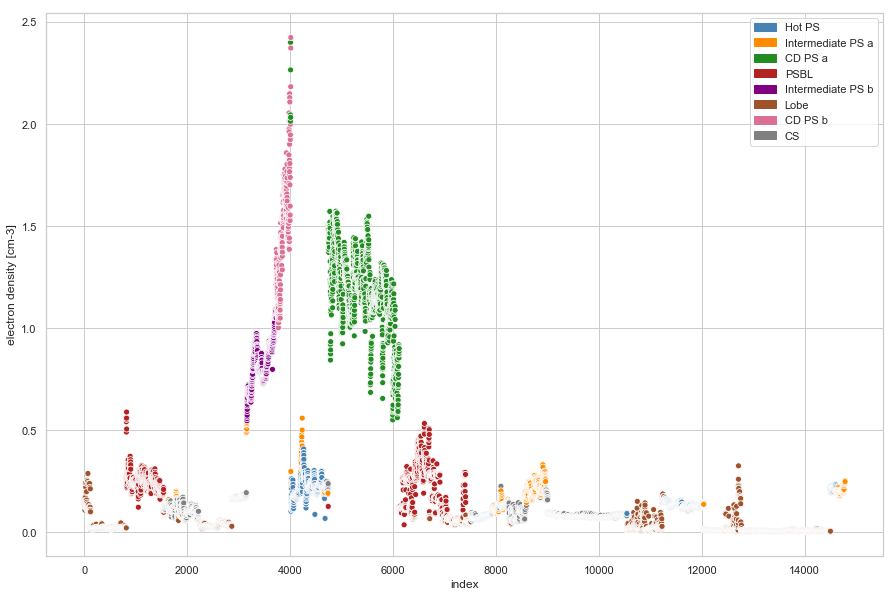

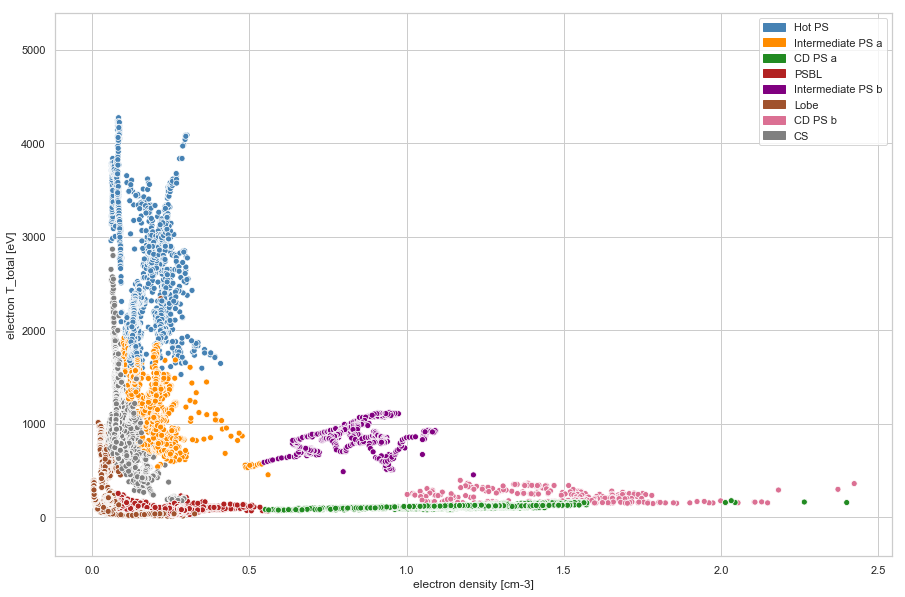

In [109]:
## electron density
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_merge_v4.index, y=df_merge_v4['density_pea'], data=df_merge_v4, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='index',ylabel='electron density [cm-3]')
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
## electron density vs T_tot
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_merge_v4['density_pea'], y=df_merge_v4['T_pea'], data=df_merge_v4, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='electron density [cm-3]',ylabel='electron T_total [eV]')
ax.set_ylim(-5*83,65*83)
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])

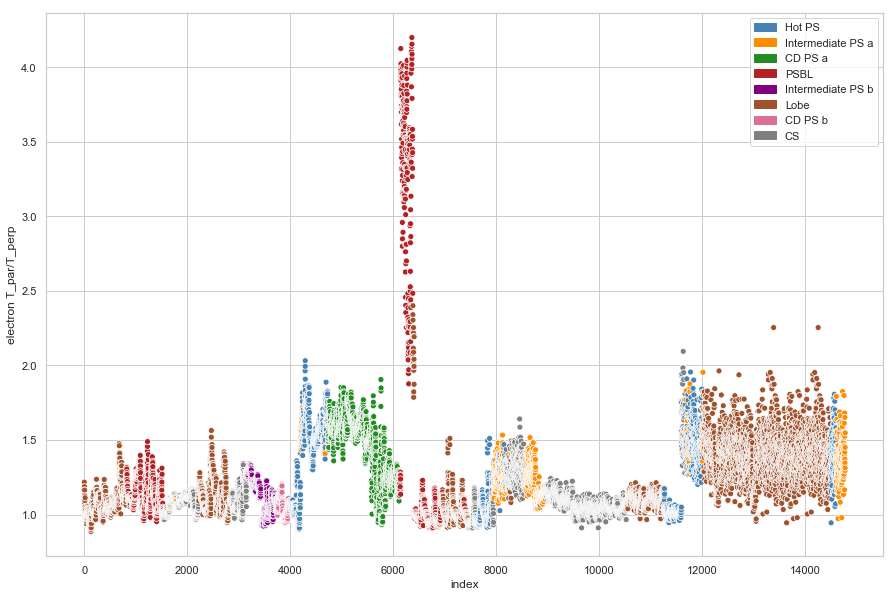

In [102]:
## electron anisotropy (T_par/T_perp)
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_merge_v4.index, y=np.array(all_T_ani_pea), data=df_merge_v4, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='index',ylabel='electron T_par/T_perp')
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])

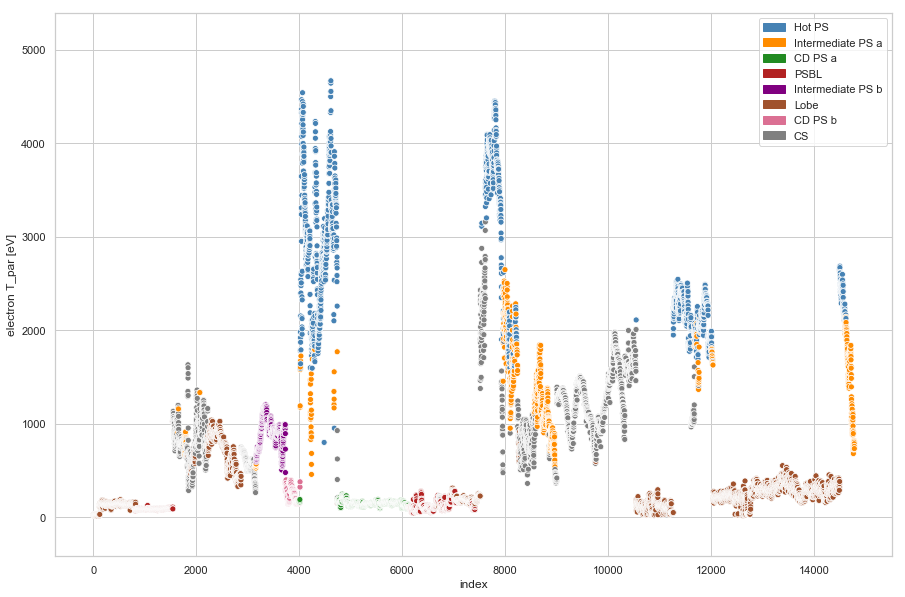

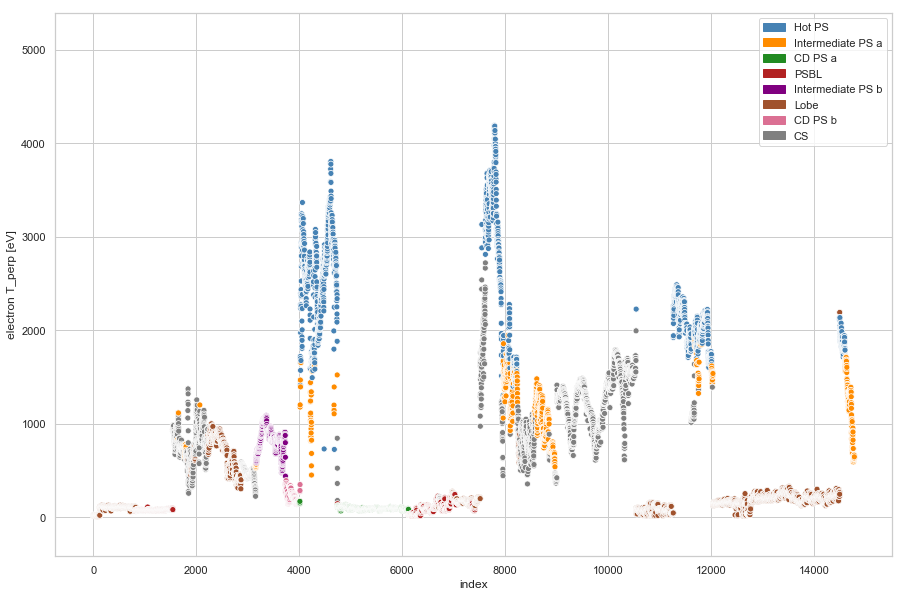

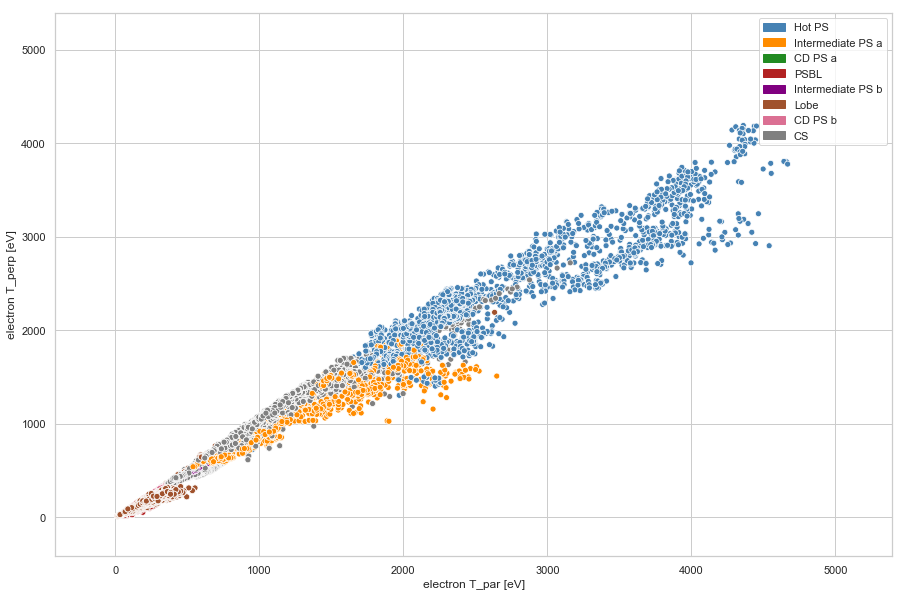

In [103]:
## electron T_par
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_merge_v4.index, y=df_merge_v4['T_par_pea'], data=df_merge_v4, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='index',ylabel='electron T_par [eV]')
ax.set_ylim(-5*83,65*83)
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
plt.show()

## electron T_perp
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_merge_v4.index, y=df_merge_v4['T_perp_pea'], data=df_merge_v4, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='index',ylabel='electron T_perp [eV]')
ax.set_ylim(-5*83,65*83)
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
plt.show()

## electron T_par vs. T_perp
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_merge_v4['T_par_pea'], y=df_merge_v4['T_perp_pea'], data=df_merge_v4, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='electron T_par [eV]',ylabel='electron T_perp [eV]')
ax.set_xlim(-5*83,65*83)
ax.set_ylim(-5*83,65*83)
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
plt.show()


In [104]:
df_merge_v5 = pd.merge_asof(df_pea, df_merge_v2, on='Timestamp')

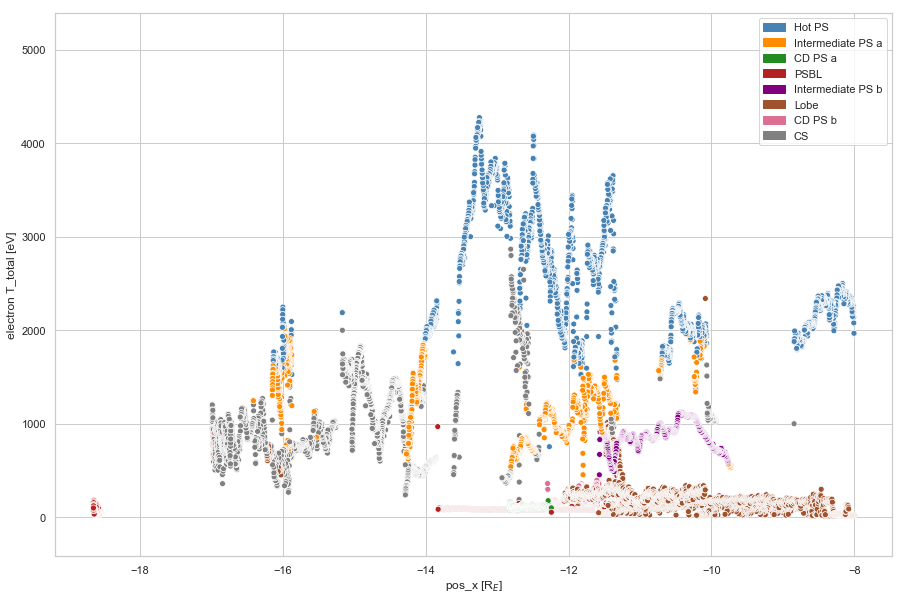

In [105]:
## electron T_total vs pos_x
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_merge_v5['B_pos_x'], y=df_merge_v5['T_pea'], data=df_merge_v4, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='pos_x [R$_{E}$]',ylabel='electron T_total [eV]')
ax.set_ylim(-5*83,65*83)
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
plt.show()

Lui, A. T. Y.: Road map to magnetotail domains., in Magnetotail Physics, pp. 3–9, Johns Hopkins Unversity Press, 1987.


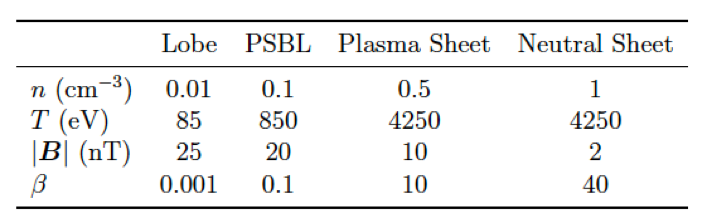

In [110]:
magnetotail_parameters = Image.open("/Users/mayur/PhD/Plots/magnetotail_params.png")
print('Lui, A. T. Y.: Road map to magnetotail domains., in Magnetotail Physics, pp. 3–9, Johns Hopkins Unversity Press, 1987.')
magnetotail_parameters

Notes:

"An increase of the electron density in the magnetotail central region seems to correspond to an intensification
of ionospheric sources and penetration of cold electrons from the magnetosheath. Thus, more
dense plasma sheet should contain colder anisotropic electron population." - Artemyev et al. (2014), 'Electron pitch angle/energy...'

*This explains the CD PS populations that show anisotropy*

Current or neutral sheet densities can be < 0.5 cm-3 - (Artemyev et al., 2010, 'Proton velocity distributions in thin...')